# Défis d'interprétation

Dans ce chapitre, nous discuterons des méthodes traditionnelles utilisées pour l'interprétation de l'apprentissage automatique à la fois pour la régression et la classification. Cela inclut les méthodes d'évaluation des performances des modèles telles que les courbes RMSE, R au carré, AUC, ROC et les nombreuses métriques dérivées des matrices de confusion. Nous explorerons également plusieurs techniques de visualisation de réduction de dimensionnalité qui peuvent être exploitées à des fins d'interprétation. Nous examinerons ensuite les limites de ces méthodes traditionnelles et expliquerons ce qui rend exactement les modèles « boîte blanche » intrinsèquement interprétables et pourquoi nous ne pouvons pas toujours utiliser des modèles boîte blanche. 

Pour répondre à cette question, nous considérerons le compromis entre les performances de prédiction et l'interprétabilité du modèle. Enfin, nous découvrirons quelques nouveaux modèles de « glass-boxe » tels que l'EBM et les règles de skope qui tentent de ne pas faire de compromis dans ce compromis. Voici les principaux sujets qui seront traités dans ce chapitre : méthodes d'interprétation de modèles 

* Comprendre les limites des méthodes d'interprétation de modèles traditionnelles 

* Étudier des modèles intrinsèquement interprétables (boîte blanche)
* Reconnaître le compromis entre performance et interprétabilité 
* Découvrir de nouveaux modèles interprétables (glass-box)

## La mission

Découvrez-vous, un consultant en science des données, dans une salle de conférence à Forth Worth, Texas, début janvier 2019. Dans cette salle de conférence, les dirigeants de l'une des plus grandes compagnies aériennes du monde, American Airlines (AA), vous informent sur leur ponctualité (OTP). OTP est un indicateur de performance clé largement accepté pour la ponctualité des vols. 

Il est mesuré comme le pourcentage de vols arrivés dans les 15 minutes suivant l'arrivée prévue. Il s'avère que AA a atteint un OTP d'un peu plus de 80% pendant 3 années consécutives, ce qui est déjà acceptable, et bien meilleur qu'avant, mais ils sont toujours neuvièmes dans le monde et 8ème en Amérique du Nord. Pour s'en vanter l'année prochaine dans leur publicité, ils aspirent à atteindre, au moins, le numéro un en Amérique du Nord pour 2019, devançant leurs plus grands rivaux. 

Sur le plan financier, on estime que les retards ont coûté à la compagnie aérienne près de 2 milliards de dollars, donc réduire ce chiffre de 25 à 35 % pour être à parité avec leurs concurrents pourrait générer des économies considérables. Et on estime que cela coûte tout autant aux passagers en raison des dizaines de millions d'heures perdues. Une réduction des retards rendrait les clients plus satisfaits, ce qui pourrait entraîner une augmentation des ventes de billets. 

Votre tâche consiste à créer des modèles qui peuvent prédire les retards pour les vols intérieurs uniquement. Ce qu'ils espèrent tirer des modèles est le suivant :

* Comprendre les facteurs qui ont le plus affecté les retards d'arrivée nationaux en 2018

* Anticiper un retard causé par la compagnie aérienne en vol avec suffisamment de précision pour atténuer certains de ces facteurs en 2019

Mais pas tous les retards sont rendus égaux. L'Association du transport aérien international (IATA) compte plus de 80 codes de retard allant de 14 (surventes, erreurs de réservation) à 75 (dégivrage des avions, enlèvement de la glace/neige, prévention du gel). Certains sont évitables et d'autres inévitables.


Les dirigeants de la compagnie aérienne vous ont dit que la compagnie aérienne n'est pas, pour l'instant, intéressée à prédire les retards causés par des événements hors de leur contrôle, tels que des conditions météorologiques extrêmes, des événements de sécurité et des problèmes de contrôle du trafic aérien. Ils ne sont pas non plus intéressés par les retards causés par les arrivées tardives de vols précédents utilisant le même avion, car ce n'était pas la cause première. Néanmoins, ils aimeraient connaître l'effet d'un hub occupé sur les retards évitables même si cela a à voir avec la congestion car, après tout, il y a peut-être quelque chose qu'ils peuvent faire avec la planification des vols ou la vitesse des vols, ou même sélection de porte. Et bien qu'ils comprennent que les vols internationaux ont parfois un impact sur les vols intérieurs, ils espèrent d'abord s'attaquer à l'important marché local.


Les dirigeants vous ont fourni un ensemble de données du Bureau des statistiques des transports du département des transports des États-Unis avec tous les vols intérieurs AA de 2018

## L'approche 

Après mûre réflexion, vous avez décidé d'aborder cela à la fois comme un problème de régression et un problème de classification. Par conséquent, vous produirez des modèles qui prédisent les minutes de retard ainsi que des modèles qui classent si les vols ont été retardés de plus de 15 minutes ou non. Pour l'interprétation, l'utilisation des deux vous permettra d'utiliser une plus grande variété de méthodes et d'élargir votre interprétation en conséquence. Aussi, la réduction de la dimensionnalité ne peut qu'enrichir davantage les possibilités d'interprétation. Nous allons donc aborder cet exemple en suivant les étapes suivantes :

1. Prédire les minutes de retard avec diverses méthodes de régression

2. Classer les vols comme retardés ou non retardés avec diverses méthodes de classification

3. Visualiser les vols retardés avec des méthodes de réduction de la dimensionnalité. 

Ces étapes de la section Examen des méthodes d'interprétation des modèles traditionnels sont suivies de conclusions réparties dans le reste des sections de ce chapitre.

## Chargement des bibliothèques

Pour exécuter cet exemple, vous devez installer les bibliothèques suivantes :

* mldatasets pour charger l'ensemble de données
* pandas et numpy pour le manipuler
* sklearn (scikit-learn), rulefit, cvae, statsmodels, interpret et skope-rules pour modélise et calcule les métriques de performance

* matplotlib et seaborn pour créer des visualisations

Chargez ces bibliothèques comme indiqué dans l'extrait suivant :

In [1]:
!pip install --upgrade machine-learning-datasets
!pip install --upgrade rulefit interpret skope-rules
!pip install --no-deps git+https://github.com/maxfrenzel/CompressionVAE.git

     |████████████████████████████████| 312 kB 7.5 MB/s 
     |████████████████████████████████| 165 kB 49.3 MB/s 
     |████████████████████████████████| 7.1 MB 40.9 MB/s 
     |████████████████████████████████| 60.3 MB 49 kB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 394.5 MB 38 kB/s 
     |████████████████████████████████| 28.0 MB 79.3 MB/s 
     |████████████████████████████████| 462 kB 44.1 MB/s 
     |████████████████████████████████| 3.8 MB 38.1 MB/s 
     |████████████████████████████████| 2.9 MB 55.8 MB/s 
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3639 sha256=f736a4f1ee96426e16e659fab8f228d84ca16d2212506d595485f4c17ad70402
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052157 sha256=3ccc5f5fa8630184d317b904a6ada23bf9119b8c8919fc66e

  Cloning https://github.com/maxfrenzel/CompressionVAE.git to /tmp/pip-req-build-kcsv87q1
  Running command git clone -q https://github.com/maxfrenzel/CompressionVAE.git /tmp/pip-req-build-kcsv87q1
  Created wheel for cvae: filename=cvae-0.0.3-py3-none-any.whl size=24596 sha256=ac9f8afdc5ef7b09c370d71989ce7a09f40699bce60003bdecedd65f0fd1341f
  Stored in directory: /tmp/pip-ephem-wheel-cache-j_yyldtu/wheels/43/48/ca/723d503fe280e78457b971a234180dfee750c137374e60bb44
Successfully built cvae


In [2]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble,\
                    neural_network, svm, decomposition, manifold
from rulefit import RuleFit
import statsmodels.api as sm
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC
import matplotlib.pyplot as plt
import seaborn as sns

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


## Comprendre et préparer les données

Nous chargeons ensuite les données comme indiqué :

In [3]:
aad18_df = mldatasets.load("aa-domestic-delays-2018")

https://github.com/PacktPublishing/Interpretable-Machine-Learning-with-Python/raw/master/datasets/aa-domestic-delays-2018.csv.zip downloaded to /content/data/aa-domestic-delays-2018.csv.zip
/content/data/aa-domestic-delays-2018.csv.zip uncompressed to /content/data/aa-domestic-delays-2018.csv
1 dataset files found in /content/data/aa-domestic-delays-2018.csv folder
parsing /content/data/aa-domestic-delays-2018.csv/aa-domestic-delays-2018.csv


Il devrait y avoir près de 900 000 enregistrements et 23 colonnes. Nous pouvons jeter un œil à ce qui a été chargé comme ça

In [4]:
aad18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899527 entries, 0 to 899526
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FL_NUM                899527 non-null  int64  
 1   ORIGIN                899527 non-null  object 
 2   DEST                  899527 non-null  object 
 3   PLANNED_DEP_DATETIME  899527 non-null  object 
 4   CRS_DEP_TIME          899527 non-null  int64  
 5   DEP_TIME              899527 non-null  float64
 6   DEP_DELAY             899527 non-null  float64
 7   DEP_AFPH              899527 non-null  float64
 8   DEP_RFPH              899527 non-null  float64
 9   TAXI_OUT              899527 non-null  float64
 10  WHEELS_OFF            899527 non-null  float64
 11  CRS_ELAPSED_TIME      899527 non-null  float64
 12  PCT_ELAPSED_TIME      899527 non-null  float64
 13  DISTANCE              899527 non-null  float64
 14  CRS_ARR_TIME          899527 non-null  int64  
 15  

## Le dictionnaire de données

Examinons le dictionnaire de données.Les caractéristiques générales sont les suivantes :

* FL_NUM : numéro de vol
* ORIGINE : code de l'aéroport de départ (IATA)
* DEST : code de l'aéroport de destination (IATA)

Les caractéristiques de départ sont les suivantes :

* PLANNED_DEP_DATETIME : la date prévue et l'heure du vol.
* CRS_DEP_TIME : l'heure de départ prévue.
* DEP_TIME : l'heure de départ réelle.
* DEP_AFPH : le nombre de vols réels par heure se produisant au cours de l'intervalle entre le départ prévu et réel de la aéroport d'origine (en tenant compte de 30 minutes de remplissage). La fonction vous indique à quel point l'aéroport d'origine était occupé pendant le décollage

* DEP_RFPH : le nombre relatif de vols par heure au départ est le rapport entre les vols réels par heure et le nombre médian de vols par heure qui se produisent à l'aéroport d'origine à ce moment de la journée, le jour de la semaine et le mois de l'année. La fonction vous indique à quel point l'aéroport d'origine était relativement occupé pendant le décollage

* TAXI_OUT : la durée écoulée entre le départ de la porte de l'aéroport d'origine et les roues éteintes.

* WHEELS_OFF : moment où les roues de l'avion quitter le sol.

Les caractéristiques en vol sont les suivantes :

* CRS_ELAPSED_TIME : le temps prévu nécessaire pour le voyage en avion.
* PCT_ELAPSED_TIME : le rapport entre le temps de vol réel et le temps de vol
prévu pour évaluer la vitesse.

* DISTANCE : la distance entre deux aéroports.


Caractéristiques d'arrivée :

* CRS_ARR_TIME : l'heure d'arrivée prévue.
* ARR_AFPH : le nombre de vols réels par heure se produisant pendant l'intervalle entre l'heure d'arrivée prévue et réelle à l'aéroport de destination (en tenant compte de 30 minutes de remplissage). La fonction vous indique le taux d'occupation de l'aéroport de destination lors de l'atterrissage.

* ARR_RFPH : les vols relatifs à l'arrivée par heure sont le rapport entre les vols réels par heure et le nombre médian de vols par heure qui se produisent à l'aéroport de destination à ce moment de la journée, ce jour de la semaine et ce mois de l'année. La fonction vous indique à quel point l'aéroport de destination était relativement occupé pendant l'atterrissage. 

Fonctionnalités de retard :

* DEP_DELAY : le retard total au départ en minutes.
* ARR_DELAY : le retard total à l'arrivée en minutes peut être subdivisé en tout ou partie des suivants : 

  * ARR_DELAY : le retard total à l'arrivée en minutes peut être subdivisé en tout ou partie des éléments suivants : chargement des bagages, ravitaillement, etc.).
  
  * WEATHER_DELAY : le retard en minutes causé par des conditions météorologiques importantes (réelles ou prévues).
  
  * NAS_DELAY : le retard en minutes imposé par un système aéronautique national tel que non-conditions météorologiques extrêmes, opérations aéroportuaires, volume de trafic important et contrôle du trafic aérien.
  
  * SECURITY_DELAY : le retard en minutes causé par l'évacuation d'un terminal ou d'un hall, le réembarquement d'un violation de la sécurité, équipement de contrôle défectueux ou longues files d'attente de plus de 29 minutes dans les zones de contrôle.
  
  * LATE_AIRCRAFT_DELAY : le retard en minutes causé par un vol précédent avec le même avion qui est arrivé en retard

## Préparation des données

Pour commencer, PLANNED_DEP_DATETIME doit être du type de données datetime :

In [5]:
aad18_df['PLANNED_DEP_DATETIME'] = pd.to_datetime(aad18_df['PLANNED_DEP_DATETIME'])

Le jour et l'heure exacts d'un vol n'ont pas d'importance, mais peut-être que le mois et le jour de la semaine le sont en raison des conditions météorologiques et saisonnières qui ne peuvent être appréciées qu'à ce niveau de granularité. De plus, les dirigeants ont mentionné que les week-ends et les hivers étaient particulièrement mauvais pour les retards. Par conséquent, nous allons créer des fonctionnalités pour le mois et le jour de la semaine

In [6]:
aad18_df['DEP_MONTH'] = aad18_df['PLANNED_DEP_DATETIME'].dt.month
aad18_df['DEP_DOW'] = aad18_df['PLANNED_DEP_DATETIME'].dt.dayofweek

Nous n'avons pas besoin de la colonne PLANNED_DEP_DATETIME, alors laissons-la tomber comme ceci :

In [7]:
aad18_df = aad18_df.drop(['PLANNED_DEP_DATETIME'], axis=1)

Il est essentiel d'enregistrer si l'aéroport d'arrivée ou de destination est une plaque tournante. AA, en 2019, avait 10 hubs : Charlotte, Chicago-O'Hare, Dallas/Fort Worth, Los Angeles, Miami, New York-JFK, New York-LaGuardia, Philadelphie, Phoenix-Sky Harbor et Washington-National. Par conséquent, nous pouvons coder quels aéroports ORIGIN et DEST sont des hubs AA en utilisant leurs codes IATA, et nous débarrasser des colonnes avec des codes car ils sont trop spécifiques (FL_NUM, ORIGIN et DEST)

In [8]:
#Create list with 10 hubs
hubs = ['CLT', 'ORD', 'DFW', 'LAX', 'MIA', 'JFK', 'LGA', 'PHL', 'PHX', 'DCA']
#Boolean series for if ORIGIN or DEST are hubs
is_origin_hub = aad18_df['ORIGIN'].isin(hubs)
is_dest_hub = aad18_df['DEST'].isin(hubs)
#Use boolean series to set ORIGIN_HUB and DEST_HUB
aad18_df['ORIGIN_HUB'] = 0
aad18_df.loc[is_origin_hub, 'ORIGIN_HUB'] = 1
aad18_df['DEST_HUB'] = 0
aad18_df.loc[is_dest_hub, 'DEST_HUB'] = 1
#Delete columns with codes
aad18_df = aad18_df.drop(['FL_NUM', 'ORIGIN', 'DEST'], axis=1)

Après toutes ces opérations, nous avons un bon nombre de fonctionnalités utiles, mais nous devons encore déterminer la fonctionnalité cible. Il y a deux colonnes qui pourraient servir à cette fin. Nous avons ARR_DELAY, qui correspond au nombre total de minutes de retard quelle que soit la raison, puis CARRIER_DELAY, qui correspond au nombre total de minutes pouvant être attribuées à la compagnie aérienne. Par exemple, regardez l'exemple suivant de vols retardés de plus de 15 minutes (ce qui est considéré comme retardé selon la définition de la compagnie aérienne) :

In [9]:
aad18_df.loc[aad18_df['ARR_DELAY'] > 15, ['ARR_DELAY','CARRIER_DELAY']].head(10)

,ARR_DELAY,CARRIER_DELAY
8,168.0,136.0
16,20.0,5.0
18,242.0,242.0
19,62.0,62.0
22,19.0,19.0
26,26.0,0.0
29,77.0,77.0
32,19.0,19.0
33,18.0,1.0
40,36.0,16.0


De tous les retards de la figure, l'un d'eux (#26) n'était pas du tout la responsabilité de la compagnie aérienne. Quatre d'entre eux étaient en partie sous la responsabilité de la compagnie aérienne (#8, #16, #33, #40), dont deux avaient plus de 15 minutes de retard en raison de la compagnie aérienne (#8, #40). Les autres étaient entièrement de la faute de la compagnie aérienne. Nous pouvons dire que bien que le retard total soit une information utile, les dirigeants de la compagnie aérienne ne s'intéressaient qu'aux retards causés par la compagnie aérienne, de sorte que ARR_DELAY peut être ignoré. De plus, il y a une autre raison plus importante pour laquelle il devrait être rejeté, et c'est que si la tâche à accomplir est de prédire un retard, nous ne pouvons pas utiliser à peu près le même retard (moins les portions non dues à la compagnie aérienne) pour le prédire. Ce serait comme utiliser le journal d'aujourd'hui légèrement caviardé pour prédire les nouvelles d'aujourd'hui. Pour cette même raison, il est préférable de supprimer ARR_DELAY

In [10]:
aad18_df = aad18_df.drop(['ARR_DELAY'], axis=1)

Enfin, nous pouvons mettre la caractéristique cible seule en tant que y et tout le reste en tant que X. Après cela, nous avons divisé y et X en ensembles de données d'apprentissage et de test. Veuillez noter que la caractéristique cible (y) reste la même pour la régression, nous la divisons donc en y_train_reg et y_test_reg. Cependant, pour la classification, nous devons faire des versions binaires de ces étiquettes indiquant s'il a plus de 15 minutes de retard ou non, appelées y_train_class et y_test_class. Veuillez noter que nous définissons un random_state xe pour la reproductibilité

In [11]:
rand = 9
y = aad18_df['CARRIER_DELAY']
X = aad18_df.drop(['CARRIER_DELAY'], axis=1).copy()
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.15, random_state=rand)
y_train_class = y_train_reg.apply(lambda x: 1 if x > 15 else 0)
y_test_class = y_test_reg.apply(lambda x: 1 if x > 15 else 0)

Pour examiner dans quelle mesure les caractéristiques sont linéairement corrélées avec la cible CARRIER_DELAY, nous calculons le coefficient de corrélation de Pearson, transformons les coefficients en valeurs absolues (car nous ne voulons pas savoir s'ils sont corrélés positivement ou négativement) et les trions par ordre décroissant. ordre:

In [12]:
corr = aad18_df.corr()
abs(corr['CARRIER_DELAY']).sort_values(ascending=False)

CARRIER_DELAY          1.000000
DEP_DELAY              0.703935
ARR_RFPH               0.101742
LATE_AIRCRAFT_DELAY    0.083166
DEP_RFPH               0.058659
ARR_AFPH               0.035135
DEP_TIME               0.030941
NAS_DELAY              0.026792
WHEELS_OFF             0.026787
TAXI_OUT               0.024635
PCT_ELAPSED_TIME       0.020980
CRS_DEP_TIME           0.016032
ORIGIN_HUB             0.015334
DEST_HUB               0.013932
DISTANCE               0.010680
DEP_MONTH              0.009728
CRS_ELAPSED_TIME       0.008801
DEP_DOW                0.007043
CRS_ARR_TIME           0.007029
DEP_AFPH               0.006053
WEATHER_DELAY          0.003002
SECURITY_DELAY         0.000460
Name: CARRIER_DELAY, dtype: float64

Cependant, cela n'est corrélé que linéairement et sur une base individuelle. Cela ne signifie pas qu'ils n'ont pas de relation non linéaire ou que plusieurs fonctionnalités interagissant ensemble n'auraient pas d'impact sur la cible. Dans la section suivante, nous en discuterons davantage

## Revoir les méthodes traditionnelles d'interprétation des modèles

 Pour explorer autant de classes de modèles et de méthodes d'interprétation que possible, nous allons adapter les données aux modèles de régression et de classification ainsi qu'aux méthodes de réduction de dimensionnalité.

## Prédire les minutes de retard avec diverses méthodes de régression 

Pour comparer et contraster les méthodes de régression, nous allons d'abord créer un dictionnaire nommé reg_models. Chaque modèle est son propre dictionnaire et la fonction qui le crée dans l'attribut model. Cette structure sera utilisée plus tard pour stocker proprement le modèle ajusté et ses métriques. Les classes de modèles de ce dictionnaire ont été choisies pour représenter plusieurs familles de modèles et pour illustrer des concepts importants que nous aborderons plus tard :

In [13]:
reg_models = {
        #Generalized Linear Models (GLMs)
        'linear':{'model': linear_model.LinearRegression()}, 
        'linear_poly':{'model': make_pipeline(PolynomialFeatures(degree=2),
                              linear_model.LinearRegression(fit_intercept=False)) },
        'linear_interact':{'model': make_pipeline(PolynomialFeatures(interaction_only=True),
                              linear_model.LinearRegression(fit_intercept=False)) },
        'ridge':{'model': linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]) }, 
        #Trees  
        'decision_tree':{'model': tree.DecisionTreeRegressor(max_depth=7, random_state=rand)},
        #RuleFit
        'rulefit':{'model': RuleFit(max_rules=150, rfmode='regress', random_state=rand)}, 
        #Nearest Neighbors
        'knn':{'model': neighbors.KNeighborsRegressor(n_neighbors=7)}, 
        #Ensemble Methods
        'random_forest':{'model':ensemble.RandomForestRegressor(max_depth=7, random_state=rand)}, 
        #Neural Networks
        'mlp':{'model':neural_network.MLPRegressor(hidden_layer_sizes=(21,), max_iter=500, 
                                                   early_stopping=True, random_state=rand)}
    }

Avant de commencer à ajuster les données à ces modèles, nous allons les expliquer brièvement un par un : 

* linéaire : la régression linéaire a été la première classe de modèles dont nous avons discuté. Pour le meilleur ou pour le pire, il fait plusieurs hypothèses sur les données. La principale d'entre elles est l'hypothèse selon laquelle la prédiction doit être une combinaison linéaire de caractéristiques X. Cela limite naturellement la capacité de découvrir des relations et des interactions non linéaires entre les entités. 

*  linear_poly : la régression polynomiale étend la régression linéaire en ajoutant des caractéristiques polynomiales. Dans ce cas, comme indiqué par degré=2, le degré polynomial est deux, il est donc quadratique. Cela signifie qu'en plus d'avoir toutes les entités sous leur forme monôme (par exemple, DEP_FPH), il les a également sous une forme quadratique (par exemple, DEP_FPH2), ainsi que les nombreux termes d'interaction pour l'ensemble des 21 entités. En d'autres termes, pour DEP_FPH, il y aurait des termes d'interaction tels que DEP_FPH ´ DISTANCE, DEP_FPH ´ DELAY, et ainsi de suite pour le reste des fonctionnalités

* linear_interact :  est comme le modèle de régression polynomiale mais sans les termes quadratiques. En d'autres termes, uniquement les interactions, comme interaction_only=True le suggérerait. C'est utile parce qu'il n'y a aucune raison de croire que l'une de nos caractéristiques ait une relation mieux adaptée aux termes quadratiques. Pourtant, c'est peut-être l'interaction avec d'autres fonctionnalités qui a un impact

* Ridge : La régression Ridge est une variante de la régression linéaire. Cependant, même si la méthode derrière la régression linéaire, appelée les moindres carrés ordinaires (OLS), fait un assez bon travail pour réduire l'erreur, en adaptant le modèle aux caractéristiques, elle le fait sans considérer le surdimensionnement. Le problème ici est que l'OLS traite toutes les caractéristiques de la même manière, de sorte que le modèle devient plus complexe à mesure que chaque variable est ajoutée. Comme le suggère le mot surdimensionnement, le modèle résultant ajuste trop bien les données d'apprentissage, ce qui entraîne le biais le plus faible mais la variance la plus élevée. Il y a un point idéal dans ce compromis entre biais et variance, et une façon d'y parvenir est de réduire la complexité ajoutée par l'introduction de trop de fonctionnalités. La régression linéaire n'est pas équipée pour le faire à elle seule. C'est là qu'intervient la régression des crêtes, avec la régularisation de notre ami. Il le fait en réduisant les coeficients qui ne contribuent pas au résultat avec un terme de pénalité appelé la norme L2. Dans cet exemple, nous utilisons une version à validation croisée de ridge (RidgeCV) qui teste plusieurs forces de régularisation (alphas).


* decision_tree : Un arbre de décision est exactement comme son nom l'indique. Imaginez une structure arborescente où à chaque point où les branches se subdivisent pour former plus de branches, il y a un "test" effectué sur une fonctionnalité partitionnant les ensembles de données dans chaque branche. Lorsque les branches cessent de se subdiviser, elles deviennent des feuilles, et à chaque feuille, il y a une décision, que ce soit d'attribuer une classe pour la classification ou une valeur xe pour la régression. Nous limitons cet arbre à max_depth=7 pour éviter le surdimensionnement car plus l'arbre est grand, mieux il s'adaptera à nos données d'apprentissage.

* rule_fit : RuleFit est une régression linéaire régularisée étendue pour inclure les interactions de fonctionnalités sous la forme de règles. Les règles sont formées en parcourant un arbre de décision, sauf qu'il rejette les feuilles et conserve les interactions de caractéristiques trouvées en traversant les branches vers ces feuilles. Il utilise la régression Lasso, qui, comme la crête, utilise la régularisation, mais au lieu d'utiliser la norme L2, il utilise la norme L1. Le résultat est que les caractéristiques inutiles finissent avec un coecient de zéro et ne convergent pas simplement vers zéro, comme elles le font avec L2. Nous limitons les règles à 150 (max_rules=150) et l'attribut rfmode='regress' indique à RuleFit qu'il s'agit d'un problème de régression, car il peut également être utilisé pour la classification. Contrairement à tous les autres modèles utilisés ici, ce n'est pas un scikit-learn mais a été créé par Christoph Molnar adaptant un papier


* knn : k-Nearest Neighbors (kNN) est une méthode simple basée sur l'hypothèse de localité, c'est-à-dire que les points de données proches les uns des autres sont similaires. En d'autres termes, ils doivent avoir des valeurs prédites similaires et, en pratique, ce n'est pas une mauvaise estimation, il prend donc les points de données les plus proches du point que vous souhaitez prédire et en déduit une prédiction. Dans ce cas, n_neighbors=7 donc = 7 . Il s'agit d'un modèle d'apprentissage automatique basé sur des instances, également appelé apprenant paresseux, car il stocke simplement les données d'entraînement. Au cours de l'inférence, il utilise des données d'entraînement pour calculer la similitude avec les points et générer une prédiction sur cette base. Cela s'oppose à ce que font les techniques d'apprentissage automatique basées sur des modèles, ou les apprenants enthousiastes, qui consistent à utiliser des données d'entraînement pour apprendre des formules, des paramètres, des coefficients ou des biais/poids, qu'elle exploite ensuite pour faire une prédiction lors de l'inférence .

* random_forest : Imaginez non pas un mais des centaines d'arbres de décision formés sur des combinaisons aléatoires des caractéristiques et des échantillons aléatoires des données. random forest prend une moyenne de ces arbres de décision générés aléatoirement pour créer le meilleur arbre. Ce concept consistant à entraîner des modèles moins ecaces en parallèle et à les combiner à l'aide d'un processus de moyenne s'appelle l'ensachage. Il s'agit d'une méthode d'ensemble car elle combine plusieurs modèles (généralement appelés apprenants faibles) en un apprenant fort. En plus de l'ensachage, il existe deux autres techniques d'ensemble, appelées boosting et stacking. Pour un ensachage plus profond, les arbres sont meilleurs car ils réduisent la variance, c'est pourquoi nous utilisons max_depth=7.

* mlp : fonctions d'activation linéaire (MLPRegressor utilise ReLU par défaut), descente de gradient stochastique et rétropropagation. Dans ce cas, nous utilisons 21 neurones dans la première et unique couche cachée, donc hidden_layer_sizes=(21,), exécutons l'entraînement pendant 500 époques (max_iter=500) et terminons l'entraînement lorsque le score de validation ne s'améliore pas (early_stopping= Vrai).


Si vous ne connaissez pas certains de ces modèles, pas de panique ! Nous les couvrirons plus en détail plus tard dans ce chapitre ou plus loin dans le guide. Veuillez également noter que certains de ces modèles ont un processus aléatoire quelque part. Pour assurer la reproductibilité, nous avons défini random_state. Il serait préférable que vous vous efforciez de toujours définir cela, sinon, il le définira de manière aléatoire à chaque fois, ce qui rendra vos résultats difficiles à reproduire.


Maintenant, parcourons notre dictionnaire de modèles (reg_models), intégrons-les aux données d'apprentissage, et prédisons et calculons deux métriques en fonction de la qualité de ces prédictions. Nous enregistrerons ensuite le modèle ajusté, les prédictions de test et les métriques dans le dictionnaire pour une utilisation ultérieure. Notez que rulefit n'accepte que les tableaux numpy, nous ne pouvons donc pas l'adapter de la même manière. Notez également que rulefit et mlp prennent plus de temps que les autres à s'entraîner, cela peut donc prendre quelques minutes à exécuter :



In [ ]:
for model_name in reg_models.keys():
    if model_name != 'rulefit':
        fitted_model = reg_models[model_name]['model'].fit(X_train, y_train_reg)
    else:
        fitted_model = reg_models[model_name]['model'].fit(X_train.values, y_train_reg.values, X_test.columns)
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    reg_models[model_name]['fitted'] = fitted_model
    reg_models[model_name]['preds'] = y_test_pred
    reg_models[model_name]['RMSE_train'] = math.sqrt(metrics.mean_squared_error(y_train_reg, y_train_pred))
    reg_models[model_name]['RMSE_test'] = math.sqrt(metrics.mean_squared_error(y_test_reg, y_test_pred))
    reg_models[model_name]['R2_test'] = metrics.r2_score(y_test_reg, y_test_pred)

Nous pouvons maintenant convertir le dictionnaire en DataFrame et afficher les métriques de manière triée et codée par couleur :

In [ ]:
reg_metrics = pd.DataFrame.from_dict(reg_models, 'index')[['RMSE_train', 'RMSE_test', 'R2_test']]
reg_metrics.sort_values(by='RMSE_test').style.\
    background_gradient(cmap='viridis', low=1, high=0.3, subset=['RMSE_train', 'RMSE_test']).\
    background_gradient(cmap='plasma', low=0.3, high=1, subset=['R2_test'])

Pour interpréter les métriques de la sortie nous devons d'abord comprendre ce qu'elles signifient, à la fois en général et dans le contexte de cet exercice de régression : 

* RMSE : l'erreur quadratique moyenne est définie comme l'écart type des résidus. C'est la racine carrée des résidus au carré divisée par le nombre d'observations, dans ce cas, les vols. Il vous indique, en moyenne, à quelle distance les prédictions sont éloignées des réalités, et comme vous pouvez probablement le voir à partir du codage couleur, moins c'est mieux parce que vous voulez que vos prédictions soient aussi proches que possible des réelles dans le test ( ensemble de données. Nous avons également inclus cette métrique pour l'ensemble de données du train pour voir à quel point il se généralise. Vous vous attendez à ce que l'erreur de test soit plus élevée que l'erreur d'entraînement, mais pas de beaucoup. Si c'est le cas, comme c'est le cas pour random_forest, vous devez régler certains des paramètres. Dans ce cas, réduire la profondeur maximale des arbres, augmenter le nombre d'arbres (également appelés estimateurs) et réduire le nombre maximal de fonctionnalités à utiliser devraient faire l'affaire. D'un autre côté, avec knn, vous pouvez ajuster le K, mais il est prévu, en raison de sa nature d'apprenant paresseux, qu'il soit trop performant sur les données d'entraînement. 

* Dans tous les cas, ces chiffres sont assez bons car même notre modèle le moins performant est inférieur à un RMSE de test de 10, et environ la moitié d'entre eux ont un RMSE de test inférieur à 7,5, prédisant très probablement un retard eficacement, en moyenne, puisque le seuil pour un délai est de 15 minutes.


Notez que linear_poly est le deuxième modèle et linear_interact est le quatrième modèle le plus performant, nettement avant le modèle linéaire, ce qui suggère que la non-linéarité et l'interactivité sont des facteurs importants pour produire de meilleures performances prédictives. 

* R2 : R-squred est également connu comme le coeficient de détermination. Il est défini comme la proportion de la variance dans la cible y (résultat) qui peut être expliquée par les caractéristiques X (prédicteurs) du modèle. Il répond à la question de savoir quelle est la variabilité expliquée par le modèle en proportion de tout cela ? Et comme vous pouvez probablement le constater d'après le codage couleur, plus c'est mieux. Et nos modèles semblent inclure des caractéristiques X significatives, comme en témoignent nos coeficients de corrélation de Pearson. Donc, si cette valeur R2 était faible, il serait peut-être utile d'ajouter des fonctionnalités supplémentaires, telles que les journaux de vol, les conditions du terminal et même les éléments que les dirigeants des compagnies aériennes ont déclaré ne pas souhaiter explorer pour le moment, tels que les effets d'entraînement. et les vols internationaux. Ceux-ci pourraient combler les lacunes de la variance inexpliquée. 

Voyons si nous pouvons obtenir de bonnes mesures avec la classification

## Classer les vols comme retardés ou non avec différentes méthodes de classification 

Tout comme nous l'avons fait avec la régression, pour comparer et contraster les méthodes de classification, nous allons d'abord créer un dictionnaire pour eux nommé class_models. Chaque modèle est son propre dictionnaire et la fonction qui le crée dans l'attribut model. Cette structure sera utilisée plus tard pour stocker proprement le modèle ajusté et ses métriques. Les classes de modèles de ce dictionnaire ont été choisies pour représenter plusieurs familles de modèles et pour illustrer des concepts importants que nous aborderons plus tard. Certaines d'entre elles vous sembleront familières car ce sont les mêmes méthodes utilisées dans la régression mais appliquées à la classification :

In [ ]:
class_models = {
        #Generalized Linear Models (GLMs)
        'logistic':{'model': linear_model.LogisticRegression()}, 
        'ridge':{'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1],\
                                                         class_weight='balanced')},  
        #Tree
        'decision_tree':{'model': tree.DecisionTreeClassifier(max_depth=7, random_state=rand)},
        #Nearest Neighbors
        'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)}, 
        #Naive Bayes
        'naive_bayes':{'model': naive_bayes.GaussianNB()},
        #Ensemble Methods
        'gradient_boosting':{'model':ensemble.GradientBoostingClassifier(n_estimators=210)},
        'random_forest':{'model':ensemble.RandomForestClassifier(max_depth=11,\
                                                                 class_weight='balanced', random_state=rand)},
        #Neural Networks
        'mlp':{'model':make_pipeline(StandardScaler(),\
                                     neural_network.MLPClassifier(hidden_layer_sizes=(7,), max_iter=500,\
                                                   early_stopping=True, random_state=rand))}
    }

Veuillez noter que certains de ces modèles utilisent des poids équilibrés pour les classes (class_weight='balanced'), ce qui est très important car il s'agit d'une tâche de classification déséquilibrée. Nous entendons par là que les classes négatives sont largement plus nombreuses que les classes positives. Vous pouvez découvrir à quoi cela ressemble pour nos données d'entraînement

In [ ]:
print(y_train_class[y_train_class==1].shape[0] / y_train_class.shape[0])

Comme vous pouvez le constater, la sortie des classes positives de nos données d'entraînement ne représente que 6 % du total. Les modèles qui tiennent compte de cela obtiendront des résultats plus justes. Il existe différentes manières de tenir compte du déséquilibre de classe, dont nous discuterons plus en détail au chapitre 11, Méthodes d'atténuation des biais et d'inférence causale, mais class_weight='balanced' applique un poids inversement proportionnel aux fréquences de classe, donnant le nombre positif classe une longueur d'avance

## Entraînement et évaluation des modèles de classification 

Maintenant, parcourons notre dictionnaire de modèles (class_models), intégrons-les aux données d'entraînement et prédisons à la fois les probabilités et la classe, à l'exception de ridge, qui ne génère pas de probabilités. Nous calculerons ensuite cinq métriques en fonction de la qualité de ces prédictions. Enfin, nous enregistrerons le modèle ajusté, les prédictions de test et les métriques dans le dictionnaire pour une utilisation ultérieure. Vous pouvez aller prendre un café pendant que vous exécutez le prochain extrait de code car gradient_boosting de sklearn prend plus de temps que le reste pour s'entraîner, donc cela peut prendre quelques minutes à exécuter

In [ ]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train_class)
    y_train_pred = fitted_model.predict(X_train.values)
    if model_name == 'ridge':
        y_test_pred = fitted_model.predict(X_test.values) 
    else:
        y_test_prob = fitted_model.predict_proba(X_test.values)[:,1]
        y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['probs'] = y_test_prob
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train_class, y_train_pred)
    class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test_class, y_test_pred)
    class_models[model_name]['Recall_train'] = metrics.recall_score(y_train_class, y_train_pred)
    class_models[model_name]['Recall_test'] = metrics.recall_score(y_test_class, y_test_pred)
    if model_name != 'ridge':
        class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test_class, y_test_prob)
    else:
        class_models[model_name]['ROC_AUC_test'] = 0
    class_models[model_name]['F1_test'] = metrics.f1_score(y_test_class, y_test_pred)
    class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test_class, y_test_pred)

Nous pouvons maintenant convertir le dictionnaire en DataFrame et afficher les métriques de manière triée et codée par couleur :

In [ ]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test',\
                                                               'Recall_train', 'Recall_test',\
                                                               'ROC_AUC_test', 'F1_test', 'MCC_test']]
class_metrics.sort_values(by='ROC_AUC_test', ascending=False).style.\
    background_gradient(cmap='plasma', low=0.3, high=1, subset=['Accuracy_train', 'Accuracy_test']).\
    background_gradient(cmap='viridis', low=1, high=0.3, subset=['Recall_train', 'Recall_test',\
                                                                 'ROC_AUC_test', 'F1_test', 'MCC_test'])

Pour interpréter les métriques de la figure 3.3, nous devons d'abord comprendre ce qu'elles signifient, à la fois en général et dans le contexte de cet exercice de classification : 

* Accuracyn:  et c'est le pourcentage de prédictions correctes sur toutes les prédictions. En d'autres termes, dans une tâche de classification binaire, vous pouvez calculer cela en additionnant le nombre de vrais positifs (TP) et de vrais négatifs (TN) et en les divisant par un décompte de toutes les prédictions faites. Comme pour les métriques de régression, vous pouvez mesurer la précision à la fois pour l'entraînement et le test pour évaluer le dépassement.

* Rappel : même si la précision semble être une excellente mesure, le rappel est bien meilleur dans ce cas et la raison en est que vous pourriez avoir une précision de 94 %, ce qui semble plutôt bien, mais il s'avère que vous ne prédisez toujours aucun retard ! En d'autres termes, même si vous obtenez une précision élevée, cela n'a de sens que si vous prédisez avec précision pour la classe la moins représentée, les retards. Nous pouvons trouver ce nombre avec rappel (également connu sous le nom de sensibilité ou taux de vrais positifs), qui est TP / TP + FN et il peut être interprété comme la quantité de résultats pertinents renvoyés. En d'autres termes, dans ce cas, quel pourcentage des retards réels était prévu. Une autre bonne mesure impliquant de vrais positifs est la précision, c'est-à-dire la pertinence de nos échantillons prédits, c'est-à-dire TP / TP + FP. Dans ce cas, il s'agirait du pourcentage de retards prévus qui étaient des retards réels. Pour les classes déséquilibrées, il est recommandé d'utiliser les deux, mais selon votre préférence pour FN over FP , vous préférerez le rappel à la précision ou vice versa.

* ROC-AUC : ROC est l'acronyme de Receiver Operating Characteristic et a été conçu pour séparer le signal du bruit . Ce qu'il fait, c'est tracer la proportion de taux de vrais positifs (Rappel) sur l'axe des x et le taux de faux positifs sur l'axe des y. AUC signifie aire sous la courbe, qui est un nombre entre 0 et 1 qui évalue la capacité de prédiction du classificateur 1 étant parfait, 0,5 étant aussi bon qu'un tirage au sort, et tout ce qui est inférieur signifie que si nous avons inversé les résultats de notre prédiction, nous aurions une meilleure prédiction. Pour illustrer cela, générons une courbe ROC pour notre modèle le moins performant, Naïve Bayes, selon la métrique AUC :

In [ ]:
plt.figure(figsize = (12,12))
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
fpr, tpr, _ = metrics.roc_curve(y_test_class, class_models['naive_bayes']['probs'])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % class_models['naive_bayes']['ROC_AUC_test'])
plt.plot([0, 1], [0, 1], 'k--')  # coin toss line
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

Les sorties de code précédentes . Notez que la ligne diagonale représente la moitié de la zone. En d'autres termes, le point où il a des qualités de prédiction de type tirage au sort

* F1 : Le score F1 est également appelé la moyenne harmonique de précision et de rappel car il est calculé comme ceci : 2TP / 2TP + FP + FN. Comme il comprend à la fois des mesures de précision et de rappel, qui concernent la proportion de vrais positifs, c'est un bon choix de mesure à utiliser lorsque votre ensemble de données est déséquilibré et que vous ne préférez ni la précision ni le rappel.

* MCC : Matthews corrélation coeffecient est une métrique tirée de la biostatistique. Il gagne en popularité dans la communauté plus large de la science des données, car il a la capacité de produire des scores élevés en tenant compte de manière équitable de TP, FN, TN et FP car il prend en compte les proportions de classes. Cela le rend optimal pour les tâches de classification déséquilibrées. Contrairement à toutes les autres métriques utilisées jusqu'à présent, elle ne va pas de 0 à 1, mais de -1, désaccord complet, à 1, un accord total entre les prévisions et les données réelles. Le point médian, 0, équivaut à une prédiction aléatoire


Nos mesures de classification sont pour la plupart très bonnes, dépassant 96 % de précision et 75 % de rappel. Cependant, même le rappel ne fait pas tout. Par exemple, RandomForest, en raison de son équilibrage de classe avec des poids, a obtenu le rappel le plus élevé mais a mal fait en F1 et MCC, ce qui suggère que la précision n'est pas très bonne. La classification Ridge avait également le même réglage et avait un score F1 si médiocre que la précision devait être lamentable. Cela ne signifie pas que cette technique de pondération est intrinsèquement erronée, mais elle nécessite souvent plus de contrôle. Ce guide couvrira les techniques permettant d'atteindre le juste équilibre entre l'équité et l'exactitude, l'exactitude et la fiabilité, la fiabilité et la validité, etc. Il s'agit d'un exercice d'équilibre qui nécessite de nombreuses métriques et visualisations. Un élément clé de cet exercice devrait être qu'une seule métrique ne vous dira pas toute l'histoire, et l'interprétation consiste à raconter l'histoire la plus pertinente et suffisamment complète. Maintenant, pour terminer cette histoire, nous allons essayer quelques dimensionnalités méthodes de réduction

## Visualiser les vols retardés avec des méthodes de réduction de dimensionnalité 

La visualisation, et l'interprétation d'ailleurs, ne traitent pas toujours de tangibles. Avec l'apprentissage automatique, nous avons souvent affaire à des relations latentes entre des caractéristiques qui, compte tenu de leur complexité, sont difficiles à trouver et encore plus difficiles à décrire ou à visualiser. Et un moyen eficace de réduire cette complexité en les visualisant consiste à utiliser des méthodes de réduction de dimensionnalité, qui aident à extraire des représentations qui, bien qu'elles n'aient pas de nom discernable, pourraient avoir des idées identifiables dont nous pouvons tirer un sens.


Pour comparer et contraster les méthodes de réduction de dimensionnalité, nous allons d'abord créer un dictionnaire pour elles nommé dimred_methods. Chaque méthode est son propre dictionnaire et la fonction qui le crée dans l'attribut method. Cette structure sera utilisée plus tard pour stocker les données une fois réduites proprement ou, dans le cas des cvae, le modèle ajusté. Les méthodes de ce dictionnaire ont été choisies pour représenter plusieurs familles de méthodes afin d'illustrer les concepts importants que nous aborderons plus tard. 

Compte tenu de la nature potentiellement gourmande en ressources de certaines de ces méthodes, nous utilisons une version abrégée à neuf colonnes de notre ensemble de données pour le train (X_train_abbrev) et le test (X_test_abbrev). Et nous n'échantillonnons également que 10 % de l'ensemble de données de test à l'aide d'un index généré de manière aléatoire (sample_idx). Il s'agit simplement d'un tableau numpy de nombres qui nous indiquent quelles observations ont été sélectionnées au hasard. Si vous avez plus de ressources avec lesquelles travailler, n'hésitez pas à changer la sample_size en un pourcentage plus important

In [ ]:
import sys
#Next two lines of code only needed while CVAE 
#remains incompatible to Tensorflow 2.2+
import tensorflow.compat.v1 as tf
sys.modules['tensorflow'] = tf
from cvae import cvae
#Next two lines of code only needed while SkopedRules
#remains incompatible to Sklearn 0.23.0+
import six
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules

In [ ]:
X_train_abbrev = X_train.iloc[:,[0, 1, 2, 4, 8, 9, 11, 17, 20]]
X_test_abbrev = X_test.iloc[:,[0, 1, 2, 4, 8, 9, 11, 17, 20]]
np.random.seed(rand)
sample_size = 0.1
sample_idx = np.random.choice(X_test.shape[0],\
                              math.ceil(X_test.shape[0]*sample_size), replace=False)

dimred_methods = {
        #Decomposition
        'pca':{'method': decomposition.PCA(n_components=3, random_state=rand)},  
        #Manifold Learning
        't-sne':{'method': manifold.TSNE(n_components=3, random_state=rand)},
        #Variational Autoencoders
        'vae':{'method': cvae.CompressionVAE(X_train_abbrev.values,\
                                             dim_latent=3, tb_logging=False)}, 
    }

Avant de commencer à appliquer ces méthodes à nos données, nous allons les expliquer brièvement une par une : 

* pca: Principal Component Analysis (PCA). Contrairement aux autres que nous explorons ici, il est rapide en termes de calcul. Le processus de décomposition des valeurs propres trouve des vecteurs orthogonaux, ce qui signifie que géométriquement ils sont éloignés les uns des autres. C'est pour que PCA puisse réduire les dimensions à celles qui ne sont pas corrélées les unes aux autres. Son nom fait référence aux composantes principales car les vecteurs propres sont également appelés directions principales. Cela a du sens car les données sont réduites en projetant les données dans moins de dimensions tout en essayant de ne pas perdre d'informations, donc cela suppose que les directions avec les plus grandes variances sont les plus importantes. 


* t-sne: T-distributed Stochastic Neighbor Embedding (t-SNE) est l'une des méthodes les plus récentes de réduction de la dimensionnalité, et contrairement à l'ACP, elle est non linéaire, elle est donc bonne pour capturer les non-linéarités. Contrairement également à l'ACP, la théorie mathématique derrière t-SNE n'est pas l'algèbre linéaire mais la probabilité. Il minimise la différence entre les similitudes de distribution par paires entre la haute dimension (nos données d'entrée) et la représentation de basse dimension en utilisant la divergence de Kullback-Leibler (qui est une mesure de distance). Contrairement à l'ACP, qui se concentre sur l'éloignement aussi éloigné que possible des points dissemblables, le t-SNE consiste à rapprocher les points similaires.


• vae : ariational Autoencoders (VA Es ) sont une méthode d'apprentissage en profondeur qui apprend à dimension, puis le décoder de nouveau d'une dimension faible à une dimension élevée. Comme il utilise l'algèbre linéaire pour le réseau de neurones et mesure la divergence de Kullback-Leibler entre les distributions de probabilité, il contient des éléments de PCA et de t-SNE. Bien sûr, c'est différent à bien des égards. Bien que VAE minimise l'erreur de reconstruction entre les données d'origine et reconstruites, il ne préserve pas les distances entre des points similaires à un niveau granulaire comme le fait t-SNE. Contrairement à la fois à la PCA et au t-SNE, la VAE offre une réversibilité entre les dimensions basses et les dimensions supérieures et peut même générer de nouvelles données.



Veuillez noter que pour toutes les méthodes, nous réduisons les données à trois composants (n_components=3) ou dimensions (dim_latent=3). De plus, vae n'est pas seulement une méthode de réduction de dimensionnalité, mais une classe de modèle d'apprentissage automatique, elle s'entraînera donc d'abord sur les données. Ainsi, contrairement aux autres, nous utiliserons les données d'entraînement abrégées X_train_abbrev pour cet effet.

Parcourons maintenant notre dictionnaire de méthodes (dimred_methods) et effectuons la réduction de dimensionnalité avec chaque méthode. Dans le cas de vae, il y aura aussi un modèle tted. Enfin, nous sauvegardons les données réduites et le modèle ajusté pour vae, dans le dictionnaire pour une utilisation ultérieure. Deux de ces méthodes prennent quelques minutes chacune, alors ne vous inquiétez pas si cela prend du temps :

In [ ]:
for method_name in dimred_methods.keys():
    if method_name != 'vae':
        lowdim_data = dimred_methods[method_name]['method'].\
                        fit_transform(X_test_abbrev.values[sample_idx])
    else:
        fitted_model = dimred_methods[method_name]['method'].train(num_steps=1000)
        lowdim_data = fitted_model.embed(X_test_abbrev.values[sample_idx])
        dimred_methods[method_name]['fitted'] = fitted_model
    dimred_methods[method_name]['lowdim'] = lowdim_data

Alors, que pouvons-nous faire avec les données de faible dimension dont nous disposons actuellement ? Pour commencer, nous pouvons le visualiser! Ainsi, une visualisation intéressante que nous pouvons faire est de tracer les trois dimensions - appelons-les x, y et z - comme deux dimensions à la fois, tandis que nous montrons nos classifications dans différentes couleurs. Ce sera comme voir les trois dimensions sous différents angles (haut, côté et avant). Pour ce faire, nous utiliserons une fonction de traçage appelée plot_3dim_decomposition, qui prend nos données de faible dimension et trace ses trois dimensions tout en codant par couleur y_labels. Initialement, nos étiquettes peuvent être nos réels (codage 0 pour non retardé et 1 pour retardé), mais pour qu'il puisse afficher une légende, nous inclurons également y_names, qui est un dictionnaire qui aide à les traduire dans la légende de l'intrigue

In [ ]:
y_names = {0:'Not Delayed', 1:'Delayed'}

Traçons maintenant les données de faible dimension de PCA par rapport à la classe y_test_class échantillonnée :

In [ ]:
mldatasets.plot_3dim_decomposition(dimred_methods['pca']['lowdim'],\
                        y_test_class.values[sample_idx], y_names)

Dans la figure, vous pouvez dire que Delayed est séparable, dans certaines parties, de non différé, et cela est plus clair lorsque l'on compare certaines dimensions que d'autres :

In [ ]:
mldatasets.plot_3dim_decomposition(dimred_methods['t-sne']['lowdim'],\
                        y_test_class.values[sample_idx], y_names)

In [ ]:
mldatasets.plot_3dim_decomposition(dimred_methods['vae']['lowdim'],\
                        y_test_class.values[sample_idx], y_names)

t-SNE est très dense, mais vous trouvez toujours des clusters dans lesquels les retards sont répandus, et avec VAE , il est plus difficile d'identifier les clusters, en particulier dans la zone où la majeure partie du violet est concentrée. Comme vous pouvez le constater à partir de ces étapes initiales, ces techniques peuvent être utilisées pour identifier les domaines où vos classes sont les plus concentrées. Mais est-ce tout ce qu'il y a à faire ?

Il existe de nombreuses façons de tirer parti de la réduction de la dimensionnalité. Certains sont entièrement visuels et d'autres peuvent être étendus pour améliorer la sélection et l'ingénierie des fonctionnalités, la détection d'anomalies et même la modélisation où vous pouvez l'utiliser pour donner un sens aux étapes intermédiaires. Mais s'en tenir aux visualisations, pour l'instant, vous pouvez même l'utiliser pour déboguer des modèles. 


Par exemple, si au lieu des classes binaires réelles, vous affichiez les erreurs de classification (FP, FN), ou leur absence (TP, TN), pour chacune de vos observations, vous pourriez visualiser où se trouvent la plupart de vos erreurs pour un modèle sont situés. À cette fin, nous utiliserons une fonction appelée encode_classification_error_vector, qui prend nos prévisions réelles et modèles et renvoie le tableau des erreurs de classification (error_vector). En outre, son dictionnaire correspondant pour la légende du tracé error_labels. Nous pouvons ensuite le brancher dans la même fonction plot_3dim_decomposition. Nous pouvons l'utiliser pour visualiser les erreurs de classification du classificateur de crêtes que nous avons installé plus tôt, l'un de nos classificateurs les moins performants.

In [ ]:
y_test_class_samp = y_test_class.values[sample_idx]
y_test_pred_samp = class_models['ridge']['preds'][sample_idx]
error_vector, error_labels = mldatasets.encode_classification_error_vector(y_test_class_samp, y_test_pred_samp)

In [ ]:
mldatasets.plot_3dim_decomposition(dimred_methods['pca']['lowdim'],\
                        error_vector, error_labels)

In [ ]:
mldatasets.plot_3dim_decomposition(dimred_methods['t-sne']['lowdim'],\
                        error_vector, error_labels)

In [ ]:
mldatasets.plot_3dim_decomposition(dimred_methods['vae']['lowdim'],\
                        error_vector, error_labels)

Dans la figure pour toutes les techniques de réduction en trois dimensions, vous pouvez identifier les zones « faibles » où les FP et les FN sont répandus. Vous pouvez approfondir ces domaines et essayer différentes combinaisons de fonctionnalités sur la réduction de la dimensionnalité pour voir si cela fait une différence, ou même effectuer des transformations sur vos fonctionnalités. 

Si vous trouvez que les trois dimensions manquent d'expressivité pour représenter des motifs, essayez plus de dimensions. Il y a beaucoup à explorer ici. Si les techniques de réduction de la dimensionnalité capturent l'essence de vos ensembles de données, pourquoi ne pas s'y former ? Dans certains cas, cela a du sens de le faire, mais x, y et z n'ont pas de signification inhérente, et la signification est indispensable pour l'interprétation. Mais vous pouvez trouver un sens dans les clusters où vos modèles sont mal classés, et cela pourrait être étendu à tous vos modèles. En fait, vous pourriez poser et répondre à la question : où tous mes modèles ont-ils systématiquement des FP ou des FN ? Vous pouvez trouver des clusters là où cela se produit et incorporer ces informations dans vos modèles. Lorsque vous utilisez la visualisation pour examiner des modèles, les décisions ne se limitent pas aux méthodes de réduction de dimensionnalité. Certaines classes de modèles sont faciles à visualiser, comme nous le verrons plus loin dans ce chapitre. Maintenant, examinons quelques limitations des méthodes traditionnelles que nous avons pratiquées.

## Comprendre les limites des méthodes traditionnelles d'interprétation des modèles 

En bref, les méthodes d'interprétation traditionnelles ne couvrent que des questions superficielles sur vos modèles telles que les suivantes : 

* Dans l'ensemble, fonctionnent-ils bien ? ? 
* Quelles modifications des hyperparamètres peuvent avoir un impact sur les performances prédictives ? 
* Quels modèles latents pouvez-vous trouver entre les caractéristiques et leurs performances prédictives ? 


Ces questions sont très limitatives si vous essayez de comprendre non seulement si votre modèle fonctionne, mais pourquoi et comment ?


Ce manque de compréhension peut entraîner des problèmes inattendus avec votre modèle qui ne seront pas nécessairement immédiatement apparents. Considérons que les modèles, une fois déployés, ne sont pas statiques mais dynamiques. Ils sont confrontés à des défis diérents que dans le « laboratoire » lorsque vous les formiez. Ils peuvent être confrontés non seulement à des problèmes de performances, mais également à des problèmes de biais tels qu'un déséquilibre avec des classes sous-représentées ou la sécurité avec des attaques contradictoires. 

Réalisant que les fonctionnalités ont changé dans l'environnement réel, nous devrons peut-être ajouter de nouvelles fonctionnalités au lieu de simplement nous recycler avec le même ensemble de fonctionnalités. Et s'il y a des hypothèses troublantes faites par votre modèle, vous devrez peut-être réexaminer l'ensemble du pipeline. Mais comment reconnaître que ces problèmes existent en premier lieu ? C'est à ce moment-là que vous aurez besoin d'un tout nouvel ensemble d'outils d'interprétation qui peuvent vous aider à approfondir et à répondre à des questions plus spécifiques sur votre modèle. Ces outils fournissent des interprétations qui peuvent vraiment rendre compte de l'équité, de la responsabilité et de la transparence (FAT), dont nous avons discuté au chapitre 1, Interprétation, interprétabilité et explicabilité ; et pourquoi tout est-il important ?

## Étudier des modèles intrinsèquement interprétables (boîte blanche)

 Jusqu'ici, dans ce chapitre, nous avons déjà adapté nos données d'apprentissage à des classes de modèles représentant chacune de ces familles de modèles « boîte blanche ». Le but de cette section est de vous montrer exactement pourquoi ils sont intrinsèquement interprétables. Nous allons le faire en employant les modèles qui ont été précédemment ajustés

## Modèles linéaires généralisés (GLM) 

Les GLM sont une grande famille de classes de modèles qui ont un modèle pour chaque distribution statistique. Tout comme la régression linéaire suppose que votre caractéristique cible et les résidus ont une distribution normale, la régression logistique suppose la distribution de Bernoulli. Il existe des GLM pour chaque distribution, comme la régression de Poisson pour la distribution de Poisson et la réponse multinomiale pour la distribution multinomiale. 

Vous choisissez le GLM à utiliser en fonction de la distribution de votre variable cible et si vos données répondent aux autres hypothèses du GLM (elles varient). En plus d'une distribution sous-jacente, ce qui lie les GLM en une seule famille est le fait qu'ils ont tous un prédicteur linéaire. En d'autres termes, la variable cible ŷ (ou prédicteur) peut être exprimée mathématiquement comme une somme pondérée de caractéristiques X, où les poids sont appelés coefficients b. C'est la formule simple, la fonction prédictive linéaire, que tous les GLM partagent.


Cependant, bien qu'ils partagent cette même formule, ils ont chacun une fonction de lien diérente, qui fournit un lien entre la fonction prédictive linéaire et la moyenne de la distribution statistique du GLM. Cela peut ajouter une certaine non-linéarité à la formule du modèle résultant tout en conservant la combinaison linéaire entre les coefficients b et les données d'entrée X, ce qui peut être une source de confusion. 


Pourtant, il est linéaire en raison de la combinaison linéaire. Il existe également de nombreuses variantes pour des GLM spécifiques. Par exemple, la régression polynomiale est une régression linéaire avec des polynômes de ses caractéristiques, et la régression de crête est une régression linéaire avec régularisation L2. Nous ne couvrirons pas tous les GLM dans cette section car ils ne sont pas nécessaires pour l'exemple de ce chapitre, mais tous ont des cas d'utilisation plausibles. Incidemment, il existe également un concept similaire appelé modèles additifs généralisés (GAM), qui sont des GLM qui ne nécessitent pas de combinaisons linéaires de fonctionnalités et de coefficients et conservent à la place la partie addition, mais des fonctions arbitraires appliquées sur les fonctionnalités. Les GAM sont également interprétables, mais ils ne sont pas aussi courants et généralement adaptés à des cas d'utilisation spécifiques ad hoc

## Régression linéaire

Au chapitre 1, Interprétation, interprétabilité et explicabilité, et Pourquoi tout est-il important ?, nous avons couvert la formule de régression linéaire simple, qui n'a qu'une seule caractéristique X. La régression linéaire multiple étend cela pour avoir n'importe quel nombre de fonctionnalités, donc au lieu d'un.

La méthode utilisée pour arriver aux coefficients b optimaux, MCO, est bien étudiée et comprise. De plus, en plus des coefficients, vous pouvez extraire des intervalles de confiance pour chacun. L'exactitude du modèle dépend de la conformité des données d'entrée aux hypothèses : linéarité, normalité, indépendance, (principalement) un manque de multicolinéarité et d'homoscédasticité. Nous avons pas mal parlé de linéarité jusqu'à présent, nous allons donc expliquer brièvement le reste


* La normalité est la propriété que chaque caractéristique est normalement distribuée. Cela peut être testé avec un tracé Q-Q, un histogramme ou un test de Kolmogorov-Smirnov, et la non-normalité peut être corrigée avec des transformations non linéaires. Si une entité n'est pas normalement distribuée, ses intervalles de confiance coefficients seront invalides.

* L'indépendance, c'est lorsque vos observations (les lignes de votre ensemble de données) sont indépendantes les unes des autres, comme des événements diférents et sans rapport. Si vos observations ne sont pas indépendantes, cela pourrait afecter votre interprétation des résultats. Dans l'exemple de ce chapitre, si vous aviez plusieurs lignes sur le même vol, cela pourrait violer cette hypothèse et rendre les résultats difficiles à comprendre. Cela peut être testé en recherchant des numéros de vol en double.

* Le manque de multicolinéarité est souhaitable car, sinon, vous auriez des coefficients imprécis. La multicolinéarité se produit lorsque les caractéristiques sont fortement corrélées les unes aux autres. Cela peut être testé avec une matrice de corrélation, une mesure de tolérance ou un facteur d'inflation de la variance (VIF), et il peut être fixé en supprimant l'une de chaque caractéristique fortement corrélée.

* L'homoscédasticité a été brièvement discutée au chapitre 1, Interprétation, interprétabilité et explicabilité ; et pourquoi tout est-il important ? et c'est lorsque les résidus (les erreurs) sont plus ou moins égaux sur la ligne de régression. Cela peut être testé avec le test de Goldfeld-Quandt, et l'hétéroscédasticité (le manque d'homoscédasticité) peut être corrigée avec des transformations non linéaires. Cette hypothèse est souvent violée dans la pratique


Même si nous ne l'avons pas fait pour l'exemple de ce chapitre, si vous comptez beaucoup sur la régression linéaire, il est toujours bon de tester ces hypothèses avant même de commencer à adapter vos données à un modèle de régression linéaire. Ce guide ne détaillera pas comment cela est fait, car il s'agit plus de méthodes d'interprétation indépendantes des modèles et d'apprentissage en profondeur que d'explorer comment répondre aux hypothèses d'une classe spécifique de modèles tels que la normalité et l'homoscédasticité. Cependant, nous avons couvert les caractéristiques qui priment le plus sur l'interprétation dans le chapitre 2, Concepts clés de l'interprétabilité, et nous continuerons à rechercher ces caractéristiques : la non-linéarité, la non-monotonie et l'interactivité. Nous le ferons principalement parce que la linéarité et la corrélation des caractéristiques et entre elles sont toujours pertinentes, quelle que soit la classe de modélisation utilisée pour faire des prédictions. Et ce sont des caractéristiques qui peuvent être facilement testées dans les méthodes utilisées pour la régression linéaire

## Interprétation

Comment interpréter un modèle de régression linéaire ? Facile! Obtenez juste les coefficients et l'interception. Nos modèles scikit-learn ont ces attributs intégrés dans le modèle ajusté

In [ ]:
coefs_lm = reg_models['linear']['fitted'].coef_
intercept_lm = reg_models['linear']['fitted'].intercept_
print('coefficients:\t%s' % coefs_lm)
print('intercept:\t%s' % intercept_lm)

Alors maintenant vous connaissez la formule, qui ressemble à ceci :

In [ ]:
print('ŷ = %0.2f + %0.4fX₁ + %0.4fX₂ + %0.3fX₃ + ...' %\
      (intercept_lm, coefs_lm[0], coefs_lm[1], coefs_lm[2]))


Cette formule devrait fournir une certaine intuition sur la façon dont le modèle peut être interprété globalement. L'interprétation de chaque coefficient dans le modèle peut être effectuée pour la régression linéaire multiple, tout comme nous l'avons fait avec l'exemple de régression linéaire simple du chapitre 1, Interprétation, interprétabilité et explicabilité ; et pourquoi tout est-il important ?. Les coefficients agissent comme des poids, mais ils racontent aussi une histoire qui varie selon le type de caractéristique. Pour rendre l'interprétation plus gérable, mettons nos coefficients dans un DataFrame à côté des noms de chaque fonctionnalité :

In [ ]:
coef_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'coef': coefs_lm})
print(coef_df)

Voici comment interpréter une caractéristique à l'aide des coefficients de la

* Continu : comme ARR_RFPH, vous savez que pour chaque augmentation d'une unité (vols relatifs par heure), cela augmente le délai prévu de 0,373844 minutes, si tous les autres les fonctionnalités restent les mêmes.

* Binaire : comme ORIGIN_HUB, vous savez que la différence entre l'aéroport d'origine étant un hub ou non est exprimée par le coeffcient -1.029088. En d'autres termes, puisque c'est un nombre négatif, l'aéroport d'origine est un hub. Il réduit le délai d'un peu plus d'une minute si toutes les autres fonctionnalités restent les mêmes.


* Catégorique : nous n'avons pas de caractéristiques catégorielles, mais nous avons des caractéristiques ordinales qui auraient pu être, et auraient dû être, des caractéristiques catégorielles. Par exemple, DEP_MONTH et DEP_DOW sont des nombres entiers de 1-12 et 0-6, respectivement. S'ils sont traités comme des ordinaux, nous supposons, en raison de la nature linéaire de la régression linéaire, qu'une augmentation ou une diminution du nombre de mois a un impact sur le résultat. C'est la même chose avec le jour de la semaine. Mais l'impact est minime. Si nous les avions traités comme des fonctionnalités encodées factices ou à chaud, nous pourrions déterminer si les vendredis sont plus sujets aux retards des transporteurs que les samedis et mercredis, ou juillet qu'octobre et juin. Cela ne pourrait pas être modélisé avec eux dans l'ordre, car ils n'ont aucun rapport avec cet ordre (oui, c'est non linéaire !).


* Ainsi, disons, nous avions une fonctionnalité appelée DEP_FRIDAY et une autre appelée DEP_JULY. Ils sont traités comme des caractéristiques binaires et peuvent vous dire précisément quel eet un départ un vendredi ou en juillet a sur le modèle. Certaines fonctionnalités ont été volontairement conservées comme ordinales ou continues, bien qu'elles soient de bons candidats pour être catégoriques, afin de démontrer comment le fait de ne pas apporter les bons ajustements à vos fonctionnalités peut avoir un impact sur le pouvoir expressif de l'interprétation du modèle. Il aurait été bon d'en dire plus aux dirigeants des compagnies aériennes sur l'impact du jour et de l'heure d'un départ sur les retards. De plus, dans certains cas - pas dans celui-ci - un oubli comme celui-ci peut afeter gravement les performances d'un modèle de régression linéaire



L'intersection (-37,86) n'est pas une caractéristique, mais elle a une signification, c'est-à-dire que si toutes les caractéristiques étaient à 0 , quelle serait la prédiction ? En pratique, cela ne se produit que si vos caractéristiques ont toutes une raison plausible d'être 0 . Tout comme dans le chapitre 1, Interprétation, interprétabilité et explicabilité ; et pourquoi tout est-il important ? vous ne vous attendriez pas à ce que quelqu'un ait une hauteur de 0 , dans cet exemple, vous ne vous attendriez pas à ce qu'un vol ait une distance de 0 . Cependant, si vous avez standardisé les entités de sorte qu'elles aient une moyenne de 0 , vous modifieriez l'interprétation de l'interception pour qu'elle corresponde à la prédiction que vous attendez si toutes les entités sont leur valeur moyenne.

## Importance des caractéristiques : 

les coefficients peuvent également être exploités pour calculer l'importance des caractéristiques. Malheureusement, le régresseur linéaire de scikit-learn est mal équipé pour le faire car il ne produit pas l'erreur standard des coefficients $\beta$ . Selon leur importance, pour classer les caractéristiques, il suffit de diviser les $beta_s$ par leurs erreurs types correspondantes. Ce résultat est ce qu'on appelle la t-statistique :


$$t_{\beta_i} = \frac{\beta_i}{SE(\beta_i)}$$



Et puis vous prenez une valeur absolue de cela et les triez de haut en bas. C'est assez facile à calculer, mais vous avez besoin de l'erreur standard. Vous pouvez désosser l'algèbre linéaire impliquée pour la récupérer en utilisant l'interception et les coefficients renvoyés par scikit-learn. Cependant, il est probablement beaucoup plus facile de réajuster le modèle de régression linéaire, mais cette fois en utilisant la bibliothèque statsmodels, qui contient un résumé de toutes les statistiques, y compris t! Soit dit en passant, statsmodels nomme son régresseur linéaire OLS, ce qui est logique car OLS est le nom de la méthode mathématique qui ajuste les données :

In [ ]:
linreg_mdl = sm.OLS(y_train_reg, sm.add_constant(X_train))
linreg_mdl = linreg_mdl.fit()
linreg_mdl.summary()

Comme vous pouvez le voir par le résumé , il y a pas mal de choses à déballer. Ce guide n'abordera pas tout ici, sauf que la statistique t peut vous dire à quel point les caractéristiques sont importantes les unes par rapport aux autres. Il y a une autre interprétation statistique plus pertinente, qui est que si vous deviez émettre l'hypothèse que le coefficient b est 0, en d'autres termes, que la caractéristique n'a pas d'impact sur le modèle, la distance de la statistique t à partir de 0 aide à rejeter cette hypothèse nulle. C'est ce que fait la valeur p à droite de la statistique t. Ce n'est pas un hasard si le t le plus proche de 0 (pour ARR_AFPH) a la seule valeur p supérieure à 0,05. Cela place cette caractéristique à un niveau insignifiant puisque tout ce qui est inférieur à 0,05 est statistiquement significatif selon cette méthode de test d'hypothèse.

Donc, pour classer nos fonctionnalités, extrayons le bloc de données du résumé des statsmodels. Ensuite, nous laissons tomber le const (l'interception) car ce n'est pas une fonctionnalité. Nous avons besoin des noms des caractéristiques pour en comprendre le sens, nous transformons donc ce tableau de caractéristiques en son cadre de données. Ensuite, on concatène les noms dataframe avec le résumé dataframe. Enfin, nous créons une nouvelle colonne avec la valeur absolue de la statistique t et la trions en conséquence. Pour démontrer comment la valeur absolue de la statistique t et de la valeur p sont inversement liées, nous attribuons également un code couleur à ces colonnes.

In [ ]:
summary_df = linreg_mdl.summary2().tables[1]
summary_df = summary_df.drop(['const']).reset_index().rename(columns={'index':'feature'})
summary_df['t_abs'] = abs(summary_df['t'])
summary_df.sort_values(by='t_abs', ascending=False).style.\
    background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['P>|t|']).\
    background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['t_abs'])

Quelque chose de particulièrement intéressant à propos de l'importance des fonctionnalités dans le tableau est que différents types de retards occupent 5 des six premières positions. Bien sûr, cela pourrait être dû au fait que la régression linéaire confond les différents effets non linéaires qu'ils ont, ou peut-être qu'il y a quelque chose ici que nous devrions approfondir. D'autant plus que le résumé des statsmodels dans la section "Warnings" met en garde :


    Le numéro de condition est grand, 5.69e+04. Cela peut indiquer qu'il 
    existe une forte multicolinéarité ou d'autres problèmes numériques

## Régression Ridge

La régression Ridge fait partie d'une sous-famille de régressions pénalisées ou régularisées avec LASSO et ElasticNet car, comme expliqué plus haut dans ce chapitre, elle pénalise en utilisant la norme L2. Cette sous-famille est également appelée modèles linéaires clairsemés car, grâce à la régularisation, elle supprime une partie du bruit en rendant les caractéristiques non pertinentes moins pertinentes. La parcimonie dans ce contexte signifie que moins c'est plus, car une complexité réduite entraînera une variance plus faible et une généralisation améliorée.


Pour illustrer ce concept, examinez le tableau d'importance des caractéristiques que nous avons généré pour la régression linéaire. Quelque chose qui devrait être immédiatement apparent est la façon dont la colonne t_abs commence avec chaque ligne une couleur différente, puis tout un tas d'entre eux sont de la même nuance de jaune. En raison de la variation des intervalles de confiance, la valeur t absolue n'est pas quelque chose que vous pouvez prendre proportionnellement et dire que votre caractéristique principale est des centaines de fois plus pertinente que chacune de vos 10 caractéristiques inférieures. Cependant, cela devrait indiquer qu'il existe des caractéristiques significativement plus importantes que d'autres au point de ne plus être pertinentes, voire de semer la confusion, créant ainsi du bruit. Il existe de nombreuses recherches sur la façon dont un petit sous-ensemble de caractéristiques a tendance à avoir les effets les plus substantiels sur le résultat du modèle. C'est ce qu'on appelle le pari sur le principe de parcimonie. Que ce soit vrai ou non pour vos données, il est toujours bon de tester la théorie en appliquant une régularisation, notamment dans les cas où les données sont très larges (nombreuses fonctionnalités) ou présentent une multicolinéarité. Ces techniques de régression régularisées peuvent être incorporées dans les processus de sélection de caractéristiques ou pour éclairer votre compréhension des caractéristiques essentielles.


Il existe une technique pour adapter la régression ridge aux problèmes de classification. Cela a été brièvement discuté auparavant. Il convertit les étiquettes en une échelle de -1 à 1 pour l'apprentissage afin de prédire les valeurs comprises entre -1 et 1, puis les ramène à une échelle de 0-1. Cependant, il utilise une régression linéaire régularisée pour ajuster les données et peut être interprété de la même manière

## Interprétation 

La régression Ridge peut être interprétée de la même manière que la régression linéaire, à la fois globalement et localement, car une fois le modèle ajusté, il n'y a plus de différence. La formule est la même :

$$y = \beta^{ridge}X$$


Sauf que les coefficients sont différents car ils ont été pénalisés avec un paramètre $λ$, qui contrôle la quantité de retrait (également appelée pénalité) à appliquer. 

On peut comparer rapidement des coefficients en extrayant les coefficients de ridge de leur modèle ajusté et en les plaçant côte à côte dans un DataFrame avec les coefficients de la régression linéaire :

In [ ]:
coefs_ridge = reg_models['ridge']['fitted'].coef_
coef_ridge_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'coef_linear': coefs_lm,\
                        'coef_ridge': coefs_ridge})
coef_ridge_df.style.\
    background_gradient(cmap='viridis_r', low=0.3, high=0.2, axis=1)


Comme vous pouvez le voir sur sortie par le code précédent, les coefficients sont toujours légèrement différents, mais parfois ils sont inférieurs et parfois supérieurs


Nous n'avons pas enregistré le paramètre λ (que scikit-learn appelle alpha) que la validation croisée de la régression de redge a jugé optimal. Cependant, nous pouvons effectuer une petite expérience par nous-mêmes pour déterminer quel paramètre était le meilleur. Pour ce faire, nous parcourons 100 valeurs alpha possibles entre 100 (1) et 1013 (10 000 000 000 000), en adaptant les données au modèle de redge correspondant à chaque alpha, puis en ajoutant les coefficients à un tableau. Nous excluons un coefficient du tableau simplement parce qu'il est beaucoup plus grand que le reste et qu'il sera plus difficile de visualiser les effets du rétrécissement.

In [ ]:
num_alphas = 100
alphas = np.logspace(0, 13, num_alphas)
alphas_coefs = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train, y_train_reg)
    alphas_coefs.append(np.concatenate((ridge.coef_[:8],ridge.coef_[9:])))

In [ ]:
plt.figure(figsize = (12,8))
plt.gca().invert_xaxis()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.plot(alphas, alphas_coefs)
plt.xscale("log")
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Ridge coefficients', fontsize = 14)
plt.grid()
plt.show()

Quelque chose à noter dans la est que plus l'alpha est élevé, plus la régularisation est élevée. C'est pourquoi, lorsque alpha vaut 1012, tous les coefficients ont convergé vers 0, et à mesure que l'alpha devient plus petit, ils arrivent à un point où ils ont tous divergé et se sont plus ou moins stabilisés. 


Dans ce cas, ce point est atteint à environ 102. Une autre façon de le voir est lorsque tous les coefficients sont autour de 0, cela signifie que la régularisation est si forte que toutes les caractéristiques ne sont pas pertinentes. Lorsqu'elles ont suffisamment divergé et stabilisé, la régularisation les rend toutes pertinentes, ce qui va à l'encontre de la finalité. Maintenant sur cette note, si nous revenons à notre code, nous verrons que c'est ce que nous avons choisi pour les alphas dans notre RidgeCV : alphas=[1e-3, 1e-2, 1e-1, 1]. Comme vous pouvez le constater à partir du graphique précédent, au moment où les alphas ont atteint 1 et moins, les coeffcients se sont déjà stabilisés même s'ils fluctuent encore légèrement. Cela peut expliquer pourquoi notre ridge n'était pas plus performante que la régression linéaire. Habituellement, vous vous attendez à ce qu'un modèle régularisé fonctionne mieux qu'un autre, à moins que vos hyperparamètres ne soient pas corrects.

    Interprétation et hyperparamètres Une régularisation bien réglée peut aider
    à réduire le bruit et ainsi augmenter l'interprétabilité mais les alphas
    choisis pour RidgeCV ont été sélectionnés exprès pour pouvoir transmettre
    ce point : la régularisation ne peut fonctionner que si vous avez choisi
    correctement les hyperparamètres. Ou, lorsque le réglage des
    hyperparamètres de régularisation est automatique, la méthode doit être
    optimale pour votre jeu de données

## L'importance des caractéristiques 

est exactement la même qu'avec la régression linéaire, mais encore une fois, nous avons besoin de l'erreur standard des coefficients, qui ne peut pas être extraite du modèle scikit-learn. Vous pouvez utiliser la méthode statsmodels fit_regularized à cet effet

## Régression polynomiale 

La régression polynomiale est un cas particulier de régression linéaire ou logistique où les caractéristiques ont été étendues pour avoir des termes de degré plus élevé. Nous n'avons effectué que la régression linéaire polynomiale dans l'exercice de ce chapitre, nous n'aborderons donc que cette variation. Cependant, il est appliqué de la même manière. Une régression linéaire multiple à deux caractéristiques ressemblerait à ceci

$$ y = \beta_0 + \beta_1X_1+\beta_2X_2$$

Mais dans la régression polynomiale, chaque caractéristique est étendue pour avoir des termes et des interactions de degré plus élevé entre toutes les caractéristiques. Donc, si cet exemple à deux caractéristiques devait être étendu à un polynôme du deuxième degré, la formule de régression linéaire ressemblerait à ceci


$$ y = \beta_0 + \beta_1X_1+\beta_2X_2+\beta_3X_1^2+\beta_4X_1X_2+\beta_5X_2^2$$


Il s'agit toujours d'une régression linéaire à tous égards, sauf qu'elle comporte des fonctionnalités supplémentaires, des termes de degré supérieur et des interactions. Bien que vous puissiez limiter l'expansion polynomiale à une seule ou à quelques entités, nous avons utilisé PolynomialFeatures, qui le fait pour toutes les entités. Par conséquent, 21 fonctionnalités ont probablement été multipliées plusieurs fois. Nous pouvons extraire les coefficients de notre modèle ajusté et, en utilisant la propriété shape du tableau numpy, renvoyer combien de coecients ont été générés. Ce montant correspond au nombre de fonctionnalités générées





In [ ]:
print(reg_models['linear_poly']['fitted'].get_params()['linearregression'].coef_.shape[0])

Il génère 253. Nous pouvons faire la même chose avec la version de régression polynomiale, qui était uniquement avec des termes d'interaction

In [ ]:
print(reg_models['linear_interact']['fitted'].get_params()['linearregression'].coef_.shape[0])

La régression polynomiale peut être interprétée, à la fois globalement et localement, exactement de la même manière que la régression linéaire. Dans ce cas, il n'est pas pratique de comprendre une formule avec 253 termes combinés linéairement, elle perd donc ce que nous avons défini au chapitre 2, Concepts clés d'interprétabilité, comme une interprétation holistique globale. Cependant, il peut toujours être interprété dans tous les autres domaines et conserve de nombreuses propriétés de la régression linéaire. Par exemple, puisque le modèle est additif, il est donc facile de séparer les effrets des caractéristiques. Vous pouvez également utiliser les mêmes nombreuses méthodes statistiques testées et évaluées par des pairs qui sont utilisées pour la régression linéaire. Par exemple, vous pouvez utiliser la statistique t, la valeur p, les limites de confiance, le R carré, ainsi que les nombreux tests utilisés pour évaluer la qualité ou l'absence de t, l'analyse résiduelle, la corrélation linéaire et l'analyse de variance. Cette richesse de méthodes statistiquement prouvées pour tester et interpréter les modèles n'est pas une chose sur laquelle la plupart des classes de modèles peuvent compter. Malheureusement, beaucoup d'entre eux sont spécfiques au modèle de la régression linéaire et de ses cas particuliers.


De plus, nous ne le ferons pas ici car il y a tellement de termes. Néanmoins, vous pouvez sans aucun doute classer les caractéristiques pour la régression polynomiale de la même manière que nous l'avons fait pour la régression linéaire à l'aide de la bibliothèque statsmodels. Le défi consiste à déterminer l'ordre des fonctionnalités générées par PolynomialFeatures pour les nommer en conséquence dans la colonne du nom de la fonctionnalité. Une fois cela fait, vous pouvez savoir si certains termes ou interactions de second degré sont importants. Cela pourrait vous dire si ces caractéristiques ont une nature non linéaire ou dépendent fortement d'autres caractéristiques

## Régression logistique

Nous avons discuté de la régression logistique ainsi que de son interprétation et de l'importance des caractéristiques dans le chapitre 2, Concepts clés de l'interprétabilité. Nous allons seulement développer un peu cela ici dans le contexte de l'exercice de classification de ce chapitre et pour expliquer pourquoi il est exactement interprétable. Le modèle de régression logistique ajusté a des coefficients et des interceptions tout comme le modèle de régression linéaire

In [ ]:
coefs_log = class_models['logistic']['fitted'].coef_
intercept_log = class_models['logistic']['fitted'].intercept_
print('coefficients:\t%s' % coefs_log)
print('intercept:\t%s' % intercept_log)

Cependant, la façon dont ces coefficients apparaissent dans la formule pour une prédiction spécifique $(yî )$ est entièrement différente

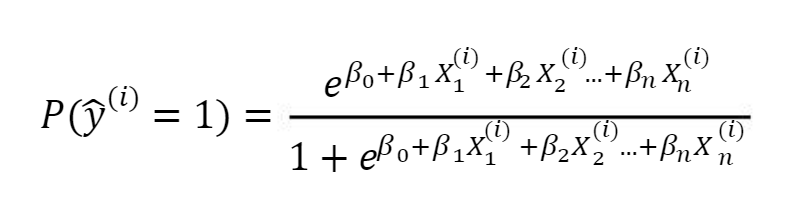


En d'autres termes, la probabilité que $\hat y = 1$ (est un cas positif) est exprimée par une fonction logistique qui implique des exponentielles de la combinaison linéaire des coefficients β et des caractéristiques. La présence des exponentielles explique pourquoi les coefficients extraits du modèle sont des log-cotes car pour isoler les coefficients, et vous devez appliquer un logarithme aux deux côtés de l'équation

## Interprétation

Pour interpréter chaque coefficient, vous le faites exactement de la même manière qu'avec la régression linéaire, sauf que chaque augmentation unitaire des caractéristiques, vous augmentez les chances d'obtenir le cas positif d'un facteur exprimé par l'exponentielle du coefficient - toutes choses étant égales par ailleurs (rappelez-vous l'hypothèse ceteris paribus discutée au chapitre 2, Concepts clés de l'interprétabilité). Un eβ exponentiel doit être appliqué à chaque coefficient car ils expriment une augmentation des log-cotes et non des cotes. En plus d'incorporer les log-cotes dans l'interprétation, la même chose que ce qui a été dit à propos de l'interprétation de régression linéaire continue, binaire et catégorique s'applique à la régression logistique

## Importance des caractéristiques 

Aussi frustrant que cela soit, il n'y a pas encore de consensus de la communauté statistique sur la meilleure façon d'obtenir l'importance des caractéristiques pour la régression logistique. Il y a une première méthode standardiser toutes les caractéristiques, une méthode pseudo R2, une méthode ROC AUC une caractéristique à la fois, une méthode statistique du chi carré partiel, puis la plus simple, qui consiste à multiplier le écarts types de chaque caractéristique multipliés par les coefficients. 

Nous ne couvrirons pas toutes ces méthodes, mais il faut noter que le calcul de l'importance des fonctionnalités de manière cohérente et fiable est un problème pour la plupart des classes de modèles, même celles en boîte blanche. Nous approfondirons ce sujet au chapitre 4, Principes fondamentaux de l'importance et de l'impact des fonctionnalités. Pour la régression logistique, la méthode la plus populaire est peut-être obtenue en standardisant toutes les caractéristiques avant la formation. C'est-à-dire en s'assurant qu'ils sont centrés à zéro et divisés par leur écart type. Mais nous ne l'avons pas fait car bien que cela présente d'autres avantages, cela rend l'interprétation des coefficients plus dificile. multipliez les écarts types de chaque caractéristique par les coefficients :

In [ ]:
stdv = np.std(X_train, 0)
abs(coefs_log.reshape(21,) * stdv).sort_values(ascending=False)


Il peut encore assez bien approximer l'importance des caractéristiques. Et tout comme avec la régression linéaire, vous pouvez dire que les fonctionnalités de retard sont classées assez haut. Les cinq d'entre eux figurent parmi les huit meilleures fonctionnalités. En effet, c'est quelque chose que nous devrions examiner. Nous en discuterons davantage au fur et à mesure que nous discuterons d'autres méthodes de boîte blanche

## Arbres de décision 

Les arbres de décision sont utilisés depuis très longtemps, avant même d'être transformés en algorithmes. Ils ne nécessitent pratiquement aucune capacité mathématique pour les comprendre et cette faible barrière à la compréhension les rend extrêmement interprétables dans leurs représentations les plus simples. Cependant, en pratique, il existe de nombreux types d'arbres de décision et la plupart d'entre eux ne sont pas très interprétables car ils utilisent des méthodes d'ensemble (boosting, bagging et stacking), voire exploitent la PCA ou un autre embedder. Même les arbres de décision non-ensembles peuvent devenir extrêmement compliqués à mesure qu'ils deviennent plus profonds. Quelle que soit la complexité d'un arbre de décision, ils peuvent toujours être exploités pour obtenir des informations importantes sur vos données et les prévisions attendues, et ils peuvent être adaptés à la fois aux tâches de régression et de classification.

## Arbres de décision CART

L'algorithme CART (Classication and Regression Trees) est l'arbre de décision "vanille" sans fioritures de choix dans la plupart des cas d'utilisation. Et comme indiqué, la plupart des arbres de décision ne sont pas des modèles de boîte blanche, mais celui-ci est exprimé sous la forme d'une formule mathématique, visualisée et imprimée sous la forme d'un ensemble de règles qui subdivisent l'arbre en branches et éventuellement en feuilles.



Et cela signifie que si selon la fonction identité I, x est dans le sous - ensemble $R_m$ , alors il renvoie un 1 , et sinon un 0 . Ce terme binaire est multiplié par les moyennes de tous les éléments du sous-ensemble $R_m$ noté $u_m$. Donc, si $x_i$ est dans le sous-ensemble appartenant au nœud feuille $R_k$ , alors la prédiction $\hat y_i=u_k$. En d'autres termes, la prédiction est la moyenne de tous les éléments du sous-ensemble $R_k$. C'est ce qui arrive aux tâches de régression, et dans la classification binaire, il n'y a tout simplement pas de multiplier par la fonction d'identification.


Au cœur de chaque algorithme d'arbre de décision, il existe une méthode pour générer les sous-ensembles. Pour CART, ceci est réalisé en utilisant ce qu'on appelle l'indice de Gini, en divisant récursivement là où les deux branches sont aussi différentes que possible

## Interprétation

Un arbre de décision peut être interprété visuellement globalement et localement. Ici, nous avons établi une profondeur maximale de 2 (max_depth=2) car nous pourrions générer les 7 calques, mais le texte serait trop petit pour être apprécié. L'une des limitations de cette méthode est qu'elle peut devenir compliquée à visualiser avec des profondeurs supérieures à 3 ou 4. Cependant, vous pouvez toujours parcourir par programmation les branches de l'arbre et ne visualiser que certaines branches à la fois :

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi=600)
tree.plot_tree(class_models['decision_tree']['fitted'],\
               feature_names=X_train.columns.values.tolist(), filled = True, max_depth=2)
fig.show()

Le code précédent imprime l'arbre . À partir de l'arbre, vous pouvez dire que la toute première branche divise l'arbre de décision en fonction de la valeur de DEP_DELAY égale ou inférieure à 20,5 . Il vous indique l'indice de Gini qui a informé cette décision et le nombre d'échantillons (juste une autre façon de dire des observations, des points de données ou des lignes) présents. Vous pouvez traverser ces branches jusqu'à ce qu'elles atteignent une feuille. Il y a un nœud feuille dans cet arbre, et il est à l'extrême gauche. Il s'agit d'un arbre de classification, vous pouvez donc dire par valeur= [629167, 0] que tous les 629 167 échantillons dans ce nœud ont été classés comme 0 (non retardé)


Une autre façon de mieux visualiser l'arbre, mais avec moins de détails tels que l'index de Gini et la taille de l'échantillon, consiste à imprimer les décisions prises dans chaque branche et la classe dans chaque nœud.

In [ ]:
text_tree = tree.export_text(class_models['decision_tree']['fitted'],\
               feature_names=X_train.columns.values.tolist())
#print(text_tree)


Il y a beaucoup plus qui peut être fait avec un arbre de décision, et scikit-learn fournit une API pour explorer l'arbre.

## Importance des caractéristiques

Le calcul de l'importance des caractéristiques dans un arbre de décision CART est relativement simple. Comme vous pouvez le constater à partir des visualisations, certaines fonctionnalités apparaissent plus souvent dans les décisions, mais leurs apparences sont pondérées par leur contribution à la réduction globale de l'indice de Gini par rapport au nœud précédent. Toute la somme de la diminution relative de l'indice de Gini dans l'arbre est calculée, et la contribution de chaque caractéristique est un pourcentage de cette réduction

In [ ]:
dt_imp_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'importance': class_models['decision_tree']['fitted'].feature_importances_}).\
            sort_values(by='importance', ascending=False)
dt_imp_df

Ce dernier tableau d'importance des caractéristiques, augmente les soupçons concernant les caractéristiques de retard. Ils occupent, encore une fois, cinq des six premières places. Est-il possible que tous les cinq aient un effet aussi démesuré sur le modèle ?



## Interprétation et domaine d'expertise

La cible CARRIER_DELAY est également appelée variable dépendante car elle dépend de toutes les autres caractéristiques, les variables indépendantes. Même si une relation statistique n'implique pas de causalité, nous voulons informer notre sélection de caractéristiques en fonction de notre compréhension des variables indépendantes qui pourraient affecter de manière plausible une variable dépendante. 

Il est logique qu'un retard de départ (DEPARTURE_DELAY) afecte le retard d'arrivée (que nous avons supprimé), et donc, CARRIER_DELAY. De même, LATE_AIRCRAFT_DELAY a du sens en tant que prédicteur car il est connu avant que le vol ne décolle si un avion précédent avait plusieurs minutes de retard, ce qui fait que ce vol risque d'arriver en retard, mais pas en tant que cause du courant flight (excluant cette option). 

Cependant, même si le site Web du Bureau of Transportation Statistics définit les retards de telle manière qu'ils semblent être des catégories distinctes, certains peuvent être déterminés bien après le départ d'un vol. Par exemple, en prédisant un retard à mi-vol, pourrions-nous prédire sur la base de WEATHER_DELAY si le mauvais temps ne s'est pas encore produit ? Et pourrions-nous prédire sur la base de SECURITY_DELAY si la faille de sécurité ne s'est pas encore produite ? Les réponses à ces questions sont que nous ne devrions probablement pas parce que la justification de leur inclusion est qu'elles pourraient servir à exclure CARRIER_DELAY mais cela ne fonctionne que s'il s'agit de catégories discrètes antérieures à la variable dépendante ! Avant de tirer d'autres conclusions, ce que vous devez faire est de parler aux dirigeants de la compagnie aérienne pour déterminer le calendrier sur lequel chaque catégorie de retard est systématiquement définie et (hypothétiquement) est accessible depuis le cockpit ou le centre de commande de la compagnie aérienne. Même si vous êtes obligé de les supprimer des modèles, d'autres données peuvent peut-être combler le vide de manière significative, telles que les 30 premières minutes de journaux de vol et/ou les modèles météorologiques historiques. L'interprétation n'est pas toujours directement déduite des données et des modèles d'apprentissage automatique, mais en travaillant en étroite collaboration avec des experts du domaine. Mais parfois, les experts du domaine peuvent aussi vous induire en erreur. En fait, un autre aperçu concerne toutes les métriques temporelles et les fonctionnalités catégorielles que nous avons conçues au début du chapitre (DEP_DOW, DEST_HUB, ORIGIN_HUB, etc.). Il s'avère qu'ils ont toujours eu peu ou pas d'eet sur les modèles. Bien que les dirigeants des compagnies aériennes aient fait allusion à l'importance des jours de la semaine, des hubs et de la congestion, nous aurions dû explorer davantage les données, à la recherche de corrélations avant de les concevoir. Mais même si nous concevons certaines fonctionnalités inutiles, il est également utile d'utiliser un modèle de boîte blanche pour évaluer leur impact, comme nous l'avons fait. En science des données, les praticiens apprendront souvent de la même manière que les modèles d'apprentissage automatique les plus performants - par essais et erreurs

## RuleFit

RuleFit est une famille de classes de modèles qui est un hybride entre une régression linéaire LASSO pour obtenir des coefficients régularisés pour chaque caractéristique et la fusionne avec des règles de décision, qu'elle utilise également LASSO pour régulariser. Ces règles de décision sont extraites en parcourant un arbre de décision pour trouver les effets d'interaction entre les caractéristiques et leur attribuer des coefficients en fonction de leur impact sur le modèle. L'implémentation utilisée dans ce chapitre utilise des arbres de décision boostés par gradient pour effectuer cette tâche.


Nous n'avons pas traité explicitement des règles de décision dans ce chapitre, mais il s'agit d'une autre famille de modèles intrinsèquement interprétables. Elles n'ont pas été incluses car, au moment de la rédaction de cet article, la seule bibliothèque Python qui prend en charge les règles de décision, appelée Bayesian Rule List (BRL) par Skater, est encore au stade expérimental. Dans tous les cas, le concept des règles de décision est très similaire. Ils extraient les interactions de caractéristiques d'un arbre de décision mais n'écartent pas le nœud feuille, et au lieu d'attribuer des coefficients, ils utilisent les prédictions du nœud feuille pour construire les règles. La dernière règle est un fourre-tout comme une instruction ELSE. Contrairement à RuleFit, il ne peut être compris que de manière séquentielle car il est si similaire à n'importe quelle instruction IF-THEN-ELSE, mais c'est son principal avantage

## Interprétation et importance des fonctionnalités

Vous pouvez mettre tout ce que vous devez savoir sur RuleFit dans une seule trame de données (rulefit_df). Ensuite, vous supprimez les règles qui ont un coefficient de 0. Il les a car dans LASSO, contrairement à Ridge, les estimations de coecient convergent vers zéro. Vous pouvez trier le cadre de données par importance de manière décroissante pour voir quelles fonctionnalités ou interactions de fonctionnalités (sous forme de règles) sont les plus importantes

In [ ]:
rulefit_df = reg_models['rulefit']['fitted'].get_rules()
rulefit_df = rulefit_df[rulefit_df.coef != 0].sort_values(by="importance", ascending=False)
rulefit_df

Il existe un type pour chaque fonction RuleFit. Ceux qui sont linéaires sont interprétés comme n'importe quel coefficient de régression linéaire. Ceux qui sont type=règle doivent également être traités comme des entités binaires dans un modèle de régression linéaire. Par exemple, si la règle WEATHER_DELAY > 255.0 & DEP_DELAY > 490.5 est vraie, alors le coefficient -333.579026 est appliqué à la prédiction. Les règles capturent les effets d'interaction, vous n'avez donc pas besoin d'ajouter manuellement des termes d'interaction au modèle ou d'utiliser une méthode non linéaire pour les trouver. De plus, il le fait d'une manière facile à comprendre. Vous pouvez utiliser RuleFit pour guider votre compréhension des interactions de fonctionnalités même si vous choisissez de produire d'autres modèles

## Nearest neighbors

Les voisins les plus proches sont une famille de modèles qui inclut même des méthodes non supervisées. Tous utilisent la proximité entre les points de données pour éclairer leurs prédictions. De toutes ces méthodes, seuls le kNN supervisé et son cousin Radius Nearest Neighbors sont quelque peu interprétables

## k-Nearest Neighbors

L'idéederrière kNN est simple. Il prend les k points les plus proches d'un point de données dans les données d'entraînement et utilise leurs étiquettes (y_train) pour informer les prédictions. Si c'est une tâche de classification, c'est le mode de toutes les étiquettes, et si c'est une tâche de régression, c'est la moyenne. C'est un apprenant paresseux car le "modèle atted" n'est pas beaucoup plus que les données d'apprentissage et les paramètres tels que k et la liste des classes (si c'est la classification). Cela ne fait pas grand-chose jusqu'à l'inférence. C'est à ce moment-là qu'il exploite les données de formation, les exploite directement plutôt que d'extraire les paramètres, les poids/biais ou les coefficients appris par le modèle comme le font les apprenants enthousiastes.

## Interprétation

kNN n'a qu'une interprétabilité locale car puisqu'il n'y a pas de modèle ajusté, vous n'avez pas d'interprétabilité globale modulaire ou globale holistique. Pour les tâches de classification, vous pouvez essayer d'avoir une idée de cela en utilisant les limites de décision et les régions que nous avons étudiées au chapitre 2, Concepts clés de l'interprétabilité. Pourtant, il est toujours basé sur des instances locales. Pour interpréter un point local de notre ensemble de données de test, nous interrogeons la trame de données pandas à l'aide de son index. Nous utiliserons le vol #721043 :

In [ ]:
print(X_test.loc[721043,:])

Dans les étiquettes y_test_class pour le vol #721043, nous pouvons dire qu'il a été retardé car ce code affiche 1 :

In [ ]:
print(y_test_class[721043])


Cependant, notre modèle kNN a prédit que ce n'était pas parce que ce code renvoie 0 :

In [ ]:
print(class_models['knn']['preds'][X_test.index.get_loc(721043)])

Veuillez noter que les prédictions sont sorties sous forme de tableau NumPy, nous ne pouvons donc pas accéder à la prédiction pour le vol #721043 en utilisant son index pandas (721043 ). Nous devons utiliser l'emplacement séquentiel de cet index dans l'ensemble de données de test en utilisant get_loc pour le récupérer.

Pour savoir pourquoi c'était le cas, nous pouvons utiliser des voisins sur notre modèle pour trouver les 7 plus proches voisins de ce point. À cette fin, nous devons remodeler nos données car les voisins ne les accepteront que sous la même forme que celle trouvée dans l'ensemble d'apprentissage, qui est (n , 21) où n est le nombre d'observations (lignes). Dans ce cas, n=1 car nous ne voulons que les voisins les plus proches pour un seul point de données. Et comme vous pouvez le constater d'après ce qui a été généré par X_test.loc[721043,:], la série des pandas a la forme (21,1) , nous devons donc inverser cette forme :

In [ ]:
print(class_models['knn']['fitted'].kneighbors(X_test.loc[721043,:].values.reshape(1,21), 7))

Le premier est la distance de chacun des sept points d'entraînement les plus proches de notre point de données de test. Et le second est l'emplacement de ces points de données dans les données d'entraînement

In [ ]:
print(y_train_class.iloc[[105172, 571912,  73409,  89450,  77474, 705972, 706911]])

Nous pouvons dire que la prédiction reflète le mode car la classe la plus courante dans les sept points les plus proches était 0 (non retardé). Vous pouvez augmenter ou diminuer le pour voir si cela tient. Incidemment, lors de l'utilisation d'une classification binaire, il est recommandé de choisir un nombre impair afin qu'il n'y ait pas de liens. Un autre aspect important est la métrique de distance qui a été utilisée pour sélectionner les points de données les plus proches. Vous pouvez facilement savoir lequel il utilise

In [ ]:
print(class_models['knn']['fitted'].effective_metric_)

La sortie est euclidienne, ce qui est logique pour cet exemple. Après tout, Euclidien est optimal pour un espace vectoriel à valeur réelle car la plupart des caractéristiques sont continues. Vous pouvez également tester des mesures de distance alternatives telles que minkowski, seuclidean ou mahalanobis. Lorsque la plupart de vos caractéristiques sont binaires et catégorielles, vous disposez d'un espace vectoriel à valeur entière. Vos distances doivent donc être calculées avec des algorithmes adaptés à cet espace comme le Hamming ou Canberra

## L'importance des caractéristiques 

L'importance des caractéristiques est, après tout, une méthode d'interprétation du modèle global et kNN a une nature hyper-locale, il n'y a donc aucun moyen de dériver l'importance des caractéristiques d'un modèle kNN

## Naïve Bayes

Comme les GLM, Naïve Bayes est une famille de classes de modèles avec un modèle adapté à différentes distributions statistiques. Cependant, contrairement à l'hypothèse des GLM selon laquelle l'entité cible a la distribution choisie, tous les modèles Naïve Bayes supposent que vos entités X ont cette distribution. Plus important encore, ils étaient basés sur le théorème de probabilité conditionnelle de Bayes, ils produisent donc une probabilité et sont donc exclusivement des classificateurs. Mais ils traitent indépendamment la probabilité que chaque caractéristique ait un impact sur le modèle, ce qui est une hypothèse forte. C'est pourquoi ils sont appelés naïfs. Il y en a un pour Bernouilli appelé Bernouilli Naïve Bayes, un pour multinomial appelé Multinomial Naïve Bayes, et, bien sûr, un pour gaussien, qui est le plus courant




## Gaussian Naïve Bayes

Le théorème de Bayes est défini par cette formule :

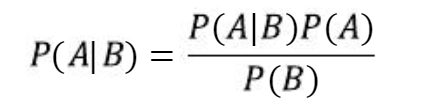

En d'autres termes, pour trouver la probabilité $A$ d'occurrence étant $B$ vraie, vous prenez la probabilité conditionnelle de $B$ étant donnée $A$ est vraie fois la probabilité d'occurrence $A$ divisée par la probabilité de $B$ . Dans le cadre d'un classificateur d'apprentissage automatique, cette formule peut être réécrite comme suit

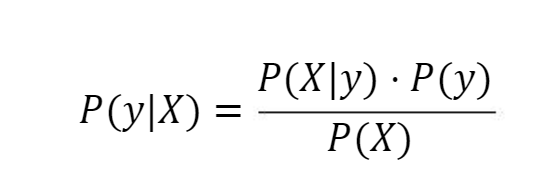

C'est parce que ce que nous voulons, c'est que la probabilité $y$ donnée soit $X$ vraie. Mais notre $X$ a plus d'une fonctionnalité, donc cela peut être étendu comme ceci :

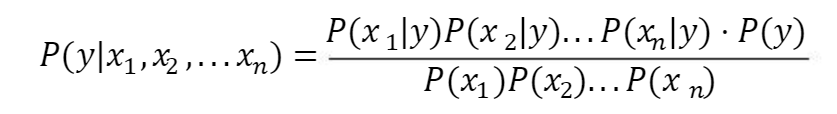

Pour calculer les prédictions $\hat y$ nous devons considérer que nous devons calculer et comparer les probabilités pour chaque classe $C_k$ (la probabilité d'un retard par rapport à la probabilité d'absence de retard) et choisir la classe avec la probabilité la plus élevée


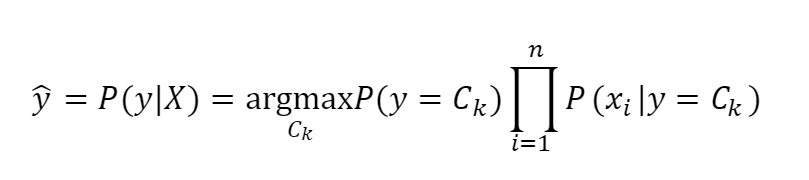

Le calcul de la probabilité de chaque classe $P(y =C_k )$ (également connue sous le nom de classe a priori) est relativement trivial. En fait, le modèle tted a stocké cela dans un attribut appelé class_prior_ :

In [ ]:
print(class_models['naive_bayes']['fitted'].class_prior_)

Naturellement, étant donné que les retards causés par le transporteur ne se produisent que 6 % du temps, il y a une probabilité marginale que cela se produise


en la formule a un produit $ ∏_{i=1}^n$ des probabilités conditionnelles que chaque caractéristique appartient à une classe $P(x|y=C_k )$ . Comme il s'agit d'un binaire, il n'est pas nécessaire de calculer les probabilités de plusieurs classes car elles sont inversement proportionnelles. Par conséquent, nous pouvons le supprimer et le remplacer par un 1 comme ceci :

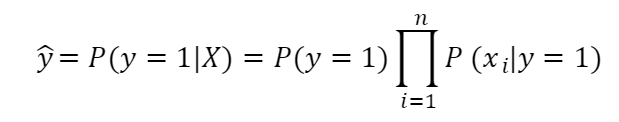

C'est parce que ce que nous essayons de prédire, c'est la probabilité d'un retard. De plus, $P(x_i | y= 1)$ est sa propre formule, qui diffère selon la distribution supposée du modèle, dans ce cas, gaussienne


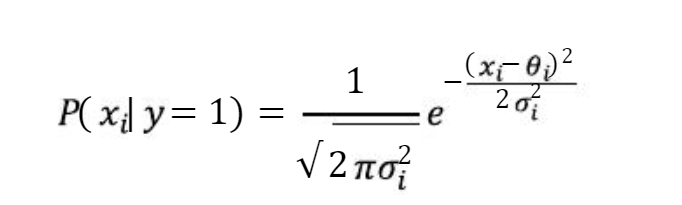


Cette formule est appelée densité de probabilité de la distribution gaussienne

## Interprétation et importance des caractéristiques

Alors, quels sont ces sigmas $(σ_i)$ et thêtas $(θ_i)$ dans la formule ? Ils sont respectivement la variance et la moyenne de la caractéristique lorsque y=1. L'intuition derrière cela est que les caractéristiques ont une variance et une moyenne différentes dans une classe par rapport à une autre, ce qui peut éclairer la classification. Il s'agit d'une tâche de classification binaire, mais vous pouvez calculer et pour les deux classes. Heureusement, le modèle ajusté a ceci stocké :

In [ ]:
print(class_models['naive_bayes']['fitted'].sigma_)

Il y a deux tableaux en sortie, le premier correspondant à la classe négative et le second à la positive. Les tableaux contiennent les sigmas (variance) pour chacune des 21 caractéristiques données à la classe :


Vous pouvez également extraire les thêtas (moyens) du modèle :

In [ ]:
print(class_models['naive_bayes']['fitted'].theta_)

Ces deux tableaux sont tout ce dont vous avez besoin pour déboguer et interpréter les résultats de Naïve Bayes car vous pouvez les utiliser pour calculer la probabilité conditionnelle de cette caractéristique $x_i$ étant donné une classe positive $P(x_i|y= 1)$ . Vous pouvez utiliser cette probabilité pour classer les caractéristiques par importance au niveau global ou interpréter une prédiction spécique, au niveau local. Naïve Bayes est un algorithme rapide avec quelques bons cas d'utilisation, l'hypothèse d'indépendance entrave ses performances dans la plupart des situations. En parlant de performance, abordons ce sujet dans le contexte de l'interprétabilité.

## Reconnaître le compromis entre les performances et l'interprétabilité 

Nous avons brièvement abordé ce sujet auparavant, mais des performances élevées nécessitent souvent de la complexité, et la complexité inhibe l'interprétabilité. Comme étudié au chapitre 2, Concepts clés de l'interprétabilité, cette complexité provient principalement de trois sources : la non-linéarité, la non-monotonie et l'interactivité. Si le modèle ajoute de la complexité, elle est aggravée par le nombre et la nature des caractéristiques de votre jeu de données, ce qui en soi est une source de complexité

## Propriétés spéciales du modèle : 

ces propriétés spéciales peuvent aider à rendre un modèle plus interprétable

## La propriété clé : explicable 

Au chapitre 1, Interprétation, interprétabilité et explicabilité ; et Pourquoi tout est-il important ?, nous avons expliqué pourquoi être capable de regarder sous le capot du modèle et de comprendre intuitivement comment toutes ses parties mobiles dérivent ses prédictions de manière cohérente est, principalement, ce qui sépare l'explicabilité de l'interprétabilité. Cette propriété est également appelée transparence ou translucidité. Un modèle peut être interprétable sans cela, mais de la même manière que nous pouvons interpréter les décisions d'une personne parce que nous ne pouvons pas comprendre ce qui se passe "sous le capot". Ceci est souvent appelé interprétabilité post-hoc et c'est le type d'interprétabilité sur lequel ce guide se concentre principalement, à quelques exceptions près. Cela étant dit, nous devons reconnaître que si un modèle est compris en tirant parti de sa formule mathématique (fondée sur la théorie statistique et des probabilités), comme nous l'avons fait avec la régression linéaire et Naïve Bayes, ou en visualisant une structure interprétable par l'homme, comme avec les arbres de décision, ou un ensemble de règles comme avec RuleFit, il est beaucoup plus interprétable que les classes de modèles d'apprentissage automatique où rien de tout cela n'est pratiquement possible. Les modèles boîte blanche auront toujours le dessus à cet égard, et comme indiqué au chapitre 1, Interprétation, interprétabilité et explicabilité ; et pourquoi tout est-il important ? il existe de nombreux cas d'utilisation dans lesquels un modèle de boîte blanche est indispensable. Mais même si vous ne produisez pas de modèles boîte blanche, ils peuvent toujours servir à aider à l'interprétation, si la dimensionnalité des données le permet. C'est une propriété clé car cela n'aurait pas d'importance si elle n'était pas conforme aux autres propriétés tant qu'elle avait une explicable ; ça serait quand même plus interprétable que ceux sans ça

## La propriété corrective : la régularisation 

Dans ce chapitre, nous avons appris que la régularisation atténue la complexité ajoutée par l'introduction de trop de fonctionnalités, et cela peut rendre le modèle plus interprétable, pour ne pas dire plus performant. Certains modèles intègrent la régularisation dans l'algorithme d'entraînement, tels que RuleFit et les arbres à gradient amélioré ; d'autres ont la capacité de l'intégrer, comme le perceptron multicouche ou la régression linéaire, et certains ne peuvent pas l'inclure, comme le kNN. La régularisation prend plusieurs formes. Les arbres de décision ont une méthode appelée élagage, qui peut aider à réduire la complexité en supprimant les branches non significatives. Les réseaux de neurones ont une technique appelée dropout, qui supprime de manière aléatoire les nœuds de réseau de neurones des couches pendant l'entraînement. La régularisation est une propriété corrective car elle peut aider même les modèles les moins interprétables à réduire la complexité et ainsi améliorer l'interprétabilité.

## Évaluation des performances 

À ce stade, dans ce chapitre, vous avez déjà évalué les performances de tous les modèles de boîte blanche examinés dans la dernière section ainsi que quelques modèles de boîte noire. Peut-être avez-vous déjà remarqué que les modèles de boîte noire ont dépassé la plupart des métriques, et pour la plupart des cas d'utilisation, c'est généralement le cas.

Déterminer quelles classes de modèles sont les plus interprétables n'est pas une science exacte, mais le tableau suivant est trié par les modèles ayant les propriétés les plus souhaitables. C'est-à-dire qu'ils n'introduisent pas la non-linéarité, la non-monotonie et l'interactivité. Bien sûr, l'explicabilité en elle-même est une propriété qui change la donne, et la régularisation peut aider. Il y a aussi des cas où il est difficile d'évaluer les propriétés. Par exemple, la régression polynomiale (linéaire) implémente un modèle linéaire, mais il s'agit de relations non linéaires, c'est pourquoi il est codé par couleur différemment. Comme vous l'apprendrez au chapitre 12, Contraintes monotones et ajustement du modèle pour l'interprétabilité, certaines bibliothèques prennent en charge l'ajout de contraintes monotones aux arbres et réseaux de neurones à gradient amplifié, ce qui signifie qu'il est possible de les rendre monotones. Cependant, les méthodes boîte noire que nous avons utilisées dans ce chapitre ne prennent pas en charge les contraintes monotones


Les colonnes de tâches vous indiquent si elles peuvent être utilisées pour la régression ou la classification. Et les colonnes Performance Rank vous montrent à quel point ces modèles sont classés dans le RMSE (pour la régression) et le ROC AUC (pour la classification), où les classements inférieurs sont meilleurs. Veuillez noter que même si nous n'avons utilisé qu'une seule mesure pour évaluer les performances de ce graphique par souci de simplicité, la discussion sur les performances devrait être plus nuancée que cela. Une autre chose à noter est que la régression de redge a mal fonctionné, mais c'est parce que nous avons utilisé les mauvais hyperparamètres, comme expliqué dans la section précédente.

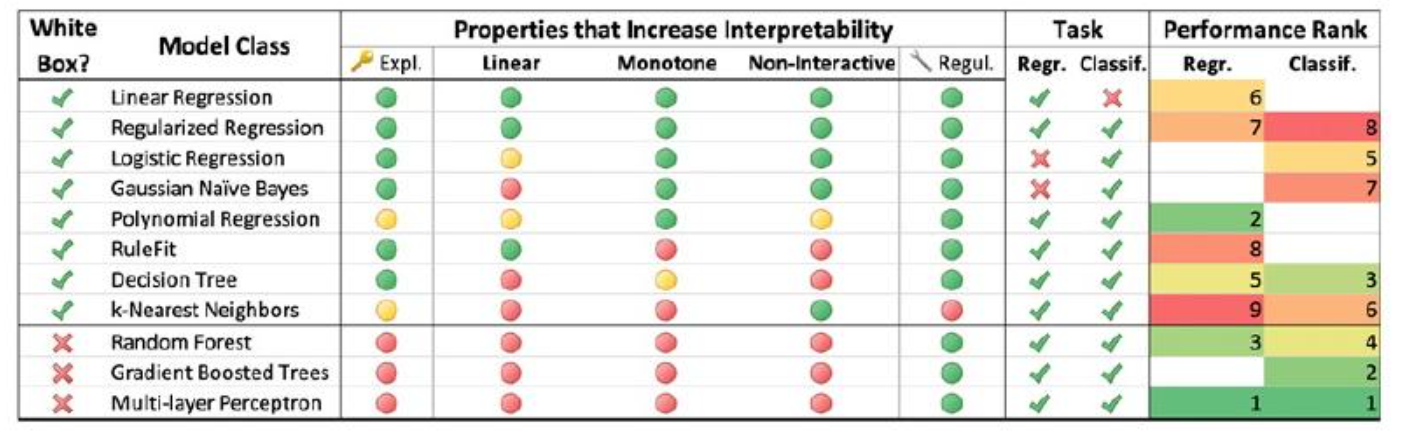

Parce qu'elle est conforme sur toutes les cinq propriétés, il est facile de dire pourquoi la régression linéaire est l'étalon-or pour l'interprétabilité. De plus, tout en reconnaissant qu'il s'agit de preuves anecdotiques, il devrait être immédiatement évident que la plupart des meilleurs classements sont avec des modèles de boîte noire. Ce n'est pas un hasard ! Les mathématiques derrière les réseaux de neurones et les arbres à gradient de gradient sont brutalement efficaces pour obtenir les meilleures métriques. Pourtant, comme le suggèrent les points rouges, ils ont toutes les propriétés qui rendent un modèle moins interprétable, faisant de leur plus grande force (complexité) une faiblesse potentielle.

C'est précisément pourquoi les modèles boîte noire sont notre principal intérêt dans ce guide, bien que la plupart des méthodes que vous apprendrez à appliquer aux modèles boîte blanche. Dans la partie 2, qui comprend les chapitres 4 à 9, nous apprendrons des méthodes spécifiques au modèle et à l'apprentissage en profondeur qui aident à l'interprétation. Et dans la partie 3, qui comprend les chapitres 10 à 14, nous apprendrons comment ajuster les modèles et les ensembles de données pour augmenter l'interprétabilité

## Interprétation et vitesse d'exécution

La performance prédictive n'est pas la seule performance à surveiller. Lorsque nous avons discuté des performances jusqu'à présent dans ce guide, nous n'avons pas abordé directement l'importance de la vitesse d'exécution (également appelée temps de calcul). Les performances prédictives sont généralement inversement proportionnelles à la fois à l'interprétabilité et à la vitesse d'exécution. Tout comme les modèles boîte noire ont tendance à mieux prédire, les modèles boîte blanche sont plus interprétables et plus rapides que les modèles boîte noire. Souvent, non seulement dans la formation mais aussi dans l'inférence. Ce problème était autrefois un élément dissuasif important. Même si les méthodes de deep learning existent depuis plus d'un demi-siècle, elles n'ont vraiment pris leur essor qu'il y a une dizaine d'années à cause des contraintes de ressources ! Alors pourquoi est-ce toujours d'actualité ? Parce que les scientifiques des données, les ingénieurs de données et les ingénieurs en apprentissage automatique repoussent continuellement les limites en augmentant la complexité de leurs modèles, la taille des ensembles de données et l'utilisation du réglage des hyperparamètres pour améliorer les performances prédictives. Ils nécessitent donc plus de ressources pour s'entraîner et éventuellement les rendre rapides à l'inférence. Cependant, un modèle qui a une inférence lente n'est pas pratique pour de nombreux cas d'utilisation, car il pourrait ne pas être rentable ou nécessiter une inférence en temps réel, ce qui aurait une latence trop importante à atteindre. Par conséquent, il existe un compromis entre les performances prédictives et les performances d'exécution. Et tandis que les chercheurs en IA repoussent les limites de l'interprétabilité des modèles, il y aura des cas où des compromis entre les trois seront pris en compte : performances prédictives, performances de vitesse d'exécution et interprétabilité (voir la figure). Une meilleure interprétabilité, tout en conservant des performances prédictives élevées, peut entraîner une perte significative des performances de vitesse d'exécution. C'est le cas des modèles de boîtes galss que nous passons en revue dans la section suivante, mais qui sait ? Un jour, nous aurons peut-être notre gâteau et le mangerons aussi !

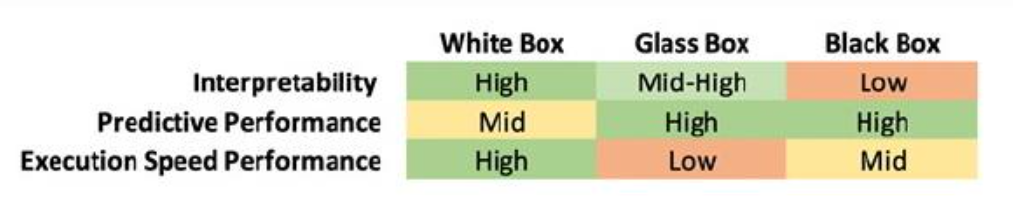

## Découvrir de nouveaux modèles interprétables (glass-box)

Récemment, des efforts importants ont été déployés à la fois dans l'industrie et dans les universités pour créer de nouveaux modèles qui peuvent avoir une complexité suffisante pour trouver le point idéal entre le sous- et le sur- dépassement, connu sous le nom de le compromis biais-variance, mais conservent un niveau adéquat d'explicabilité. 

De nombreux modèles correspondent à cette description, mais la plupart d'entre eux sont destinés à des cas d'utilisation spécifiques, n'ont pas encore été correctement testés ou ont publié une bibliothèque ou open-source le code. Cependant, deux généralistes gagnent déjà du terrain, que nous allons examiner maintenant

## Explicable Boosting Machine (EBM) 

EBM fait partie du framework InterpretML de Microsot, qui inclut de nombreuses méthodes indépendantes du modèle que nous utiliserons plus loin dans le guide. 

EBM exploite les GAM que nous avons mentionnés plus tôt, qui sont comme des modèles linéaires mais ressemblent cette:

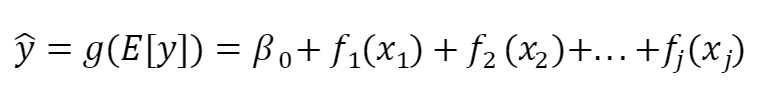

Les fonctions individuelles $f_1$ à $f_j$ sont adaptées à chaque fonction à l'aide de fonctions spline. Ensuite, une fonction de lien g adapte le GAM pour effectuer différentes tâches telles que la classification ou la régression, ou ajuster les prédictions à différentes distributions statistiques.

Les GAM sont des modèles de boîte blanche, alors qu'est-ce qui fait de l'EBM un modèle de  box-glass ? Il intègre le bagging  et le gradient boostingt, qui ont tendance à rendre les modèles plus performants. Le boost se fait une fonctionnalité à la fois en utilisant un faible taux d'apprentissage afin de ne pas les confondre. Il trouve également automatiquement des termes d'interaction pratiques, ce qui améliore les performances tout en maintenant l'interprétabilité

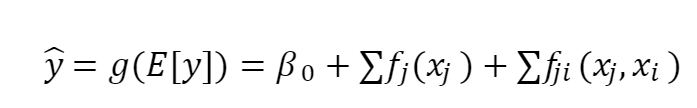

Une fois ajustée, cette formule est composée de formules non linéaires compliquées, de sorte qu'une interprétation holistique globale n'est probablement pas réalisable. Cependant, comme les effets de chaque caractéristique ou termes d'interaction par paires sont additifs, ils sont facilement séparables et une interprétation modulaire globale est tout à fait possible. L'interprétation locale est tout aussi facile étant donné qu'une formule mathématique peut aider à déboguer n'importe quelle prédiction.


Un inconvénient est que l'EBM peut être beaucoup plus lent que les arbres et les réseaux de neurones boostés par gradient en raison de l'approche une fonctionnalité à la fois, d'un faible taux d'apprentissage n'affectant pas l'ordre des fonctionnalités et des méthodes d'ajustement des splines. 

Cependant, il est parallélisable, donc dans des environnements avec de nombreuses ressources et plusieurs cœurs ou machines, ce sera beaucoup plus rapide. Pour ne pas vous faire attendre les résultats pendant une heure ou deux, il est préférable d'utiliser la même technique de réduction de la dimensionnalité en utilisant les versions abrégées de X_train et X_test. Cependant, cette fois, nous n'utiliserons que les huit caractéristiques des modèles de boîte blanche jugées les plus importantes : DEP_DELAY, LATE_AIRCRAFT_DELAY, PCT_ELAPSED_TIME, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, DISTANCE, CRS_ELAPSED_TIME et TAXI_OUT. Ceux-ci sont placés dans un tableau feature_samp, puis les trames de données X_train et X_test sont sous-ensembles pour n'inclure que cette fonctionnalité. Nous définissons le sample2_size à 10 %, mais si vous pensez avoir suffisamment de ressources pour le gérer, ajustez en conséquence :

In [ ]:
#Make new abbreviated versions of datasets
feature_samp = ['DEP_DELAY', 'LATE_AIRCRAFT_DELAY', 'PCT_ELAPSED_TIME', 'WEATHER_DELAY',\
                'NAS_DELAY', 'SECURITY_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']
X_train_abbrev2 = X_train[feature_samp]
X_test_abbrev2 = X_test[feature_samp]
#For sampling among observations
np.random.seed(rand)
sample2_size = 0.1
sample2_idx = np.random.choice(X_train.shape[0], math.ceil(X_train.shape[0]*sample2_size), replace=False)

Pour entraîner votre EBM, il vous suffit d'instancier un ExplainableBoostingClassifier(), puis d'adapter votre modèle à vos données d'entraînement. Tout comme nous l'avons fait avec la réduction de dimensionnalité, nous utilisons sample2_idx pour échantillonner une partie des données

In [ ]:
ebm_mdl = ExplainableBoostingClassifier()
ebm_mdl.fit(X_train_abbrev2.iloc[sample2_idx], y_train_class.iloc[sample2_idx])

##Interprétation globale 

L'interprétation globale est très simple. Il est livré avec un tableau de bord Explain_global que vous pouvez explorer. Il se charge d'abord du tracé de l'importance des caractéristiques et vous pouvez sélectionner des caractéristiques individuelles pour représenter graphiquement ce qui a été appris de chacune d'elles.

In [ ]:
show(ebm_mdl.explain_global())

## Interprétation locale

L'interprétation locale utilise un tableau de bord comme le fait global, sauf que vous choisissez des prédictions spécifiques à interpréter avec Explain_local. Dans ce cas, nous sélectionnons #76, qui, comme vous pouvez le constater, a été mal prédit. Mais le tracé de type LIME que nous étudierons au chapitre 6, Méthodes d'interprétation agnostique des modèles locaux, aide à lui donner un sens.

In [ ]:
ebm_lcl = ebm_mdl.explain_local(X_test_abbrev2.iloc[76:77],\
                                y_test_class[76:77], name='EBM')
show(ebm_lcl)

## Performance

Performance, au moins mesurée avec le ROC AUC, l'EBM n'est pas loin de ce qui a été réalisé par les 2 meilleurs modèles de classification, et on ne peut qu'espérer qu'il s'améliore avec 10 fois plus de données d'entraînement et de test !

In [ ]:
ebm_perf = ROC(ebm_mdl.predict_proba).\
                            explain_perf(X_test_abbrev2.iloc[sample_idx],\
                                         y_test_class.iloc[sample_idx], name='EBM')
show(ebm_perf)

Vous pouvez apprécier le tableau de bord des performances produit par le code précédent. Le tableau de bord des performances peut également comparer plusieurs modèles à la fois puisque ses explicatifs sont indépendants des modèles. Et il y a même un quatrième tableau de bord qui peut être utilisé pour l'exploration de données

## Règles Skoped

Pour les règles Skoped, les règles sont extraites d'un ensemble d'arbres comme c'est le cas avec RuleFit, et la régularisation L1 (LASSO) est également appliquée. Cependant, il utilise une forêt aléatoire au lieu d'arbres amplifiés par gradient et n'intègre pas de coefficients de régression linéaire. Au lieu de cela, il utilise uniquement les règles binaires, mais elles ne sont appliquées que si les conditions de précision et de rappel sont vérifiées, et les poids sont proportionnels au score OOB (hors sac) utilisé dans la forêt aléatoire. Soit dit en passant, OOB est comme la précision de la validation, mais en utilisant un sous-ensemble d'arbres de décision sélectionnés au hasard. En raison de l'accent mis sur la précision et le rappel, les règles Skoped peuvent être idéales pour les ensembles de données déséquilibrés tout en conservant l'interprétabilité.



Pour ajuster le modèle, instanciez SkopeRules et ajustez le modèle aux données d'apprentissage. Nous utilisons le même sample2_idx que celui utilisé avec EBM car il peut également devenir lent mais pas autant. Heureusement, n_jobs=-1 lui dit de tirer parti de tous vos cœurs de processeur. Plusieurs paramètres peuvent avoir un impact sur les performances : n_estimators est le nombre d'arbres de décision et max_depth est la profondeur de l'arbre. Dans le même temps, precision_min et rappelé_min sont la quantité minimale de précision et de rappel pour une règle à sélectionner. random_state est juste pour la reproductibilité. Comme avec EBM, cet extrait de code d'entraînement de modèle peut prendre quelques minutes

In [ ]:
sr_mdl = SkopeRules(n_estimators=200, precision_min=0.2, recall_min=0.01,\
                    n_jobs=-1, random_state=rand, max_depth=7,\
                    feature_names=X_train_abbrev2.columns)
sr_mdl.fit(X_train_abbrev2.iloc[sample2_idx], y_train_class.iloc[sample2_idx])

Dans le code suivant, la probabilité que chaque vol soit retardé est renvoyée par score_top_rules, et cela, à son tour, peut être utilisé pour créer les prédictions en utilisant np.where avec le seuil défini à 0,5

In [ ]:
sr_y_test_prob = sr_mdl.score_top_rules(X_test_abbrev2.iloc[sample_idx])
sr_y_test_pred = np.where(sr_y_test_prob > 0.5, 1, 0)

## Interprétation globale : 

l'attribut rules_ a une liste de tuples avec chaque règle. On peut les compter comme tels

In [ ]:
print(len(sr_mdl.rules_))

Comme vous pouvez le constater, 1 517 règles sont générées, mais en raison de la façon dont l'algorithme utilise la précision et le rappel, les règles ne sont pas toujours prises en compte. Cela rend l'inférence plus lente. Les règles sont triées en fonction de leurs performances. Regardons les cinq règles les plus performantes générées

In [ ]:
print(sr_mdl.rules_[0:5])

Au fur et à mesure que vous descendez la liste, vous pouvez commencer à comprendre ce qui compte le plus pour le modèle, car les instructions IF singulières, si elles sont vraies, indiquent une classe positive.

## Interprétation locale 

Examinons une méthode de prédiction locale spécifique au modèle - la prédiction pour le soixante-seizième vol n'étant pas retardée même si le vol a été retardé

In [ ]:
print('actual: %s, predicted: %s' % (y_test_class.iloc[76], sr_y_test_pred[76]))

Nous pouvons dire pourquoi en tirant parti de la fonction de décision qui vous indique le score d'anomalie pour l'échantillon d'entrée. Ce score est la somme pondérée des règles binaires, où chaque poids est la précision de chaque règle. Ainsi, plus le score est bas, plus il est probable qu'il s'agisse d'une correspondance positive, et s'il est nul, c'est une correspondance positive définie

In [ ]:
print(sr_mdl.decision_function(X_test_abbrev2.iloc[76:77]))

Le résultat est 18,23, ce qui n'est pas proche de 0 ou nul

## Performance

La performance n'était pas mauvaise étant donné qu'elle a été entraînée sur 10 % des données d'entraînement et évaluée sur seulement 10 % des données de test. Surtout le score de rappel, qui figurait parmi les trois premières places :

In [ ]:
print('accuracy: %.3g, recall: %.3g, roc auc: %.3g, f1: %.3g, mcc: %.3g' %\
      (metrics.accuracy_score(y_test_class.iloc[sample_idx], sr_y_test_pred),\
       metrics.recall_score(y_test_class.iloc[sample_idx], sr_y_test_pred),\
       metrics.roc_auc_score(y_test_class.iloc[sample_idx], sr_y_test_prob),\
       metrics.f1_score(y_test_class.iloc[sample_idx], sr_y_test_pred),\
       metrics.matthews_corrcoef(y_test_class.iloc[sample_idx], sr_y_test_pred)))

## Mission accomplie 

La mission consistait à former des modèles capables de prédire les retards évitables avec suffisamment de précision pour être utiles, puis de comprendre les facteurs qui ont eu un impact sur ces retards, selon ces modèles, pour améliorer l'OTP. 


Les modèles de régression résultants prédisaient tous des retards, en moyenne, bien inférieurs au seuil de 15 minutes selon le RMSE. Et la plupart des modèles de classification ont obtenu un score F1 bien supérieur à 50 % – l'un d'entre eux a atteint 98,8 % ! Nous avons également réussi à trouver des facteurs qui ont eu un impact sur les retards pour tous les modèles de boîte blanche, dont certains ont relativement bien fonctionné. 

Il semble donc que ce fut un succès retentissant ! Ne célébrez pas tout de suite ! Malgré les métriques élevées, cette mission a été un échec. Grâce à des méthodes d'interprétation approximatives, nous nous sommes rendu compte que les modèles étaient exacts principalement pour de mauvaises raisons. Cette prise de conscience aide à étayer la leçon essentielle à la mission selon laquelle un modèle peut facilement être correct pour les mauvaises raisons, alors la question « pourquoi ? » n'est pas une question à se poser uniquement quand il fonctionne mal mais toujours. Et c'est en utilisant des méthodes d'interprétation que nous posons cette question. Mais si la mission a échoué, pourquoi cette section est-elle appelée Mission accomplie ? Bonne question!



Il s'avère qu'il y avait une mission secrète. Indice : c'est le titre de ce chapitre. Le but était d'apprendre les défis d'interprétation communs à travers l'échec de la mission ouverte. Au cas où vous les auriez manqués, voici les défis d'interprétation sur lesquels nous sommes tombés : 

* Les méthodes traditionnelles d'interprétation des modèles ne couvrent que les questions de surface concernant vos modèles. Notez que nous avons dû recourir à des méthodes d'interprétation globales spécifiques aux modèles pour découvrir que les modèles étaient bons pour les mauvaises raisons.

* Les hypothèses peuvent faire dérailler tout projet d'apprentissage automatique, car il s'agit d'informations que vous supposez sans preuves. Notez qu'il est crucial de travailler en étroite collaboration avec des experts du domaine pour éclairer les décisions tout au long du flux de travail d'apprentissage automatique, mais parfois ils peuvent également vous induire en erreur. Assurez-vous de vérifier les incohérences entre les données et ce que vous supposez être la vérité à propos de ces données. Trouver et corriger ces problèmes est au cœur de ce qu'est l'interprétabilité.

* De nombreuses classes de modèles, même les modèles boîte blanche, ont des problèmes avec le calcul de l'importance des fonctionnalités de manière cohérente et fiable. 

* Un réglage incorrect du modèle peut conduire à un modèle qui fonctionne assez bien mais qui est moins interprétable. Notez qu'un modèle régularisé déborde moins mais est aussi plus interprétable. Nous aborderons les méthodes permettant de relever ce défi au chapitre 12, Contraintes monotones et ajustement du modèle pour l'interprétabilité. La sélection de caractéristiques et l'ingénierie peuvent également avoir le même effet, que vous pouvez lire au chapitre 10, Sélection de caractéristiques et ingénierie pour l'interprétabilité. 

* Il y a un compromis entre la performance prédictive et l'interprétabilité. Et ce compromis s'étend à la vitesse d'exécution. Pour ces raisons, ce guide se concentre principalement sur les modèles de boîte noire, qui ont les performances prédictives que nous recherchons et une vitesse d'exécution raisonnable, mais pourraient avoir besoin d'aide du côté de l'interprétabilité. Si vous avez pris connaissance de ces défis, alors félicitations ! Mission accomplie!